<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Step 1: Business Understanding</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 2rem;
      line-height: 1.6;
      background-color: #f9f9f9;
    }
    h1 {
      font-size: 2rem;
    }
    h2 {
      font-size: 1.5rem;
      margin-top: 1.5rem;
    }
    ul {
      margin-top: 0.5rem;
      padding-left: 1.2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    .emoji {
      margin-right: 0.4rem;
    }
  </style>
</head>
<body>

  <h1><span class="emoji">🧠</span>Step 1: Business Understanding</h1>

  <h2><span class="emoji">🎯</span>Objective:</h2>
  <p>
    Create a recommendation system that finds the top 5 players most similar to a given player based on various performance and physical characteristics.
  </p>

  <h2><span class="emoji">✅</span>Questions to answer:</h2>
  <ul>
    <li>Who will use this system? (Analysts, scouts, gamers?)</li>
    <li>What kind of similarity matters? (Skill stats, physical stats, both?)</li>
    <li>Do we want to include all players or only by position, age group, etc.?</li>
  </ul>

</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Step 2: Data Understanding</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 2rem;
      line-height: 1.6;
      background-color: #f9f9f9;
    }
    h1 {
      font-size: 2rem;
    }
    h2 {
      font-size: 1.5rem;
      margin-top: 1.5rem;
    }
    ul {
      margin-top: 0.5rem;
      padding-left: 1.2rem;
    }
    li {
      margin-bottom: 0.5rem;
    }
    .emoji {
      margin-right: 0.4rem;
    }
  </style>
</head>
<body>

  <h1><span class="emoji">📊</span>Step 2: Data Understanding</h1>

  <h2><span class="emoji">✅</span>Actions:</h2>
  <ul>
    <li>Load the dataset (CSV or Excel).</li>
    <li>Understand column types: numeric, categorical, text.</li>
    <li>Identify missing values.</li>
    <li>Explore unique values in key columns (Foot, Team & Contract, Body_type, etc.).</li>
  </ul>

</body>
</html>


In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("SOFIFA_17_Jan_2024.csv")

# Print the shape of the DataFrame
print("DataFrame Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("-" * 50)

# Print the column names
print("Columns in the DataFrame:")
print(df.columns)
print("-" * 50)



DataFrame Shape:
Rows: 9150, Columns: 79
--------------------------------------------------
Columns in the DataFrame:
Index(['Image_URL', 'Name', 'Age', 'Overall_rating', 'Potential',
       'Team&Contract', 'ID', 'Height', 'Weight', 'Foot', 'Best_Overall',
       'Best_Position', 'Growth', 'Joined', 'Loan_date_end', 'Value', 'Wage',
       'Release_clause', 'Total_attacking', 'Crossing', 'Finishing',
       'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
       'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control',
       'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility',
       'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping',
       'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
       'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
       'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle',
       'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking',
       'GK_Positionin

In [3]:
# Print data types of each column
print("Data Types of Columns:")
df.dtypes


Data Types of Columns:


Image_URL                object
Name                     object
Age                     float64
Overall_rating          float64
Potential               float64
                         ...   
Traits.1                float64
PlayStyles               object
PlayStyles +             object
Number_of_playstyles    float64
Acceleration_type        object
Length: 79, dtype: object

In [4]:
# Print the count of missing values per column
print("Missing Values Count per Column:")
print(df.isnull().sum())
print("-" * 50)




Missing Values Count per Column:
Image_URL                488
Name                     150
Age                      150
Overall_rating           150
Potential                150
                        ... 
Traits.1                9150
PlayStyles              2187
PlayStyles +            9062
Number_of_playstyles     150
Acceleration_type        150
Length: 79, dtype: int64
--------------------------------------------------


In [5]:
# Print the first few rows of the DataFrame
print("First 5 Rows of the DataFrame:")
print(df.head())
print("-" * 50)

First 5 Rows of the DataFrame:
                                           Image_URL                 Name  \
0  https://cdn.sofifa.net/players/239/085/24_60.p...                  NaN   
1  https://cdn.sofifa.net/players/239/085/24_60.p...        E. Haaland ST   
2  https://cdn.sofifa.net/players/239/085/24_60.p...      K. Mbappé ST LW   
3  https://cdn.sofifa.net/players/239/085/24_60.p...  K. De Bruyne CM CAM   
4  https://cdn.sofifa.net/players/239/085/24_60.p...           H. Kane ST   

    Age  Overall_rating  Potential                     Team&Contract  \
0   NaN             NaN        NaN                               NaN   
1  22.0            91.0       94.0      Manchester City\n2022 ~ 2027   
2  24.0            91.0       94.0  Paris Saint-Germain\n2018 ~ 2024   
3  32.0            91.0       91.0      Manchester City\n2015 ~ 2025   
4  29.0            90.0       90.0    FC Bayern München\n2023 ~ 2027   

         ID         Height         Weight   Foot  ...  Passing / Kicking 

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:")
print(numerical_columns)


Numerical Columns:
['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending', 'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats', 'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']


In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['Image_URL', 'Name', 'Team&Contract', 'Height', 'Weight', 'Foot', 'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']


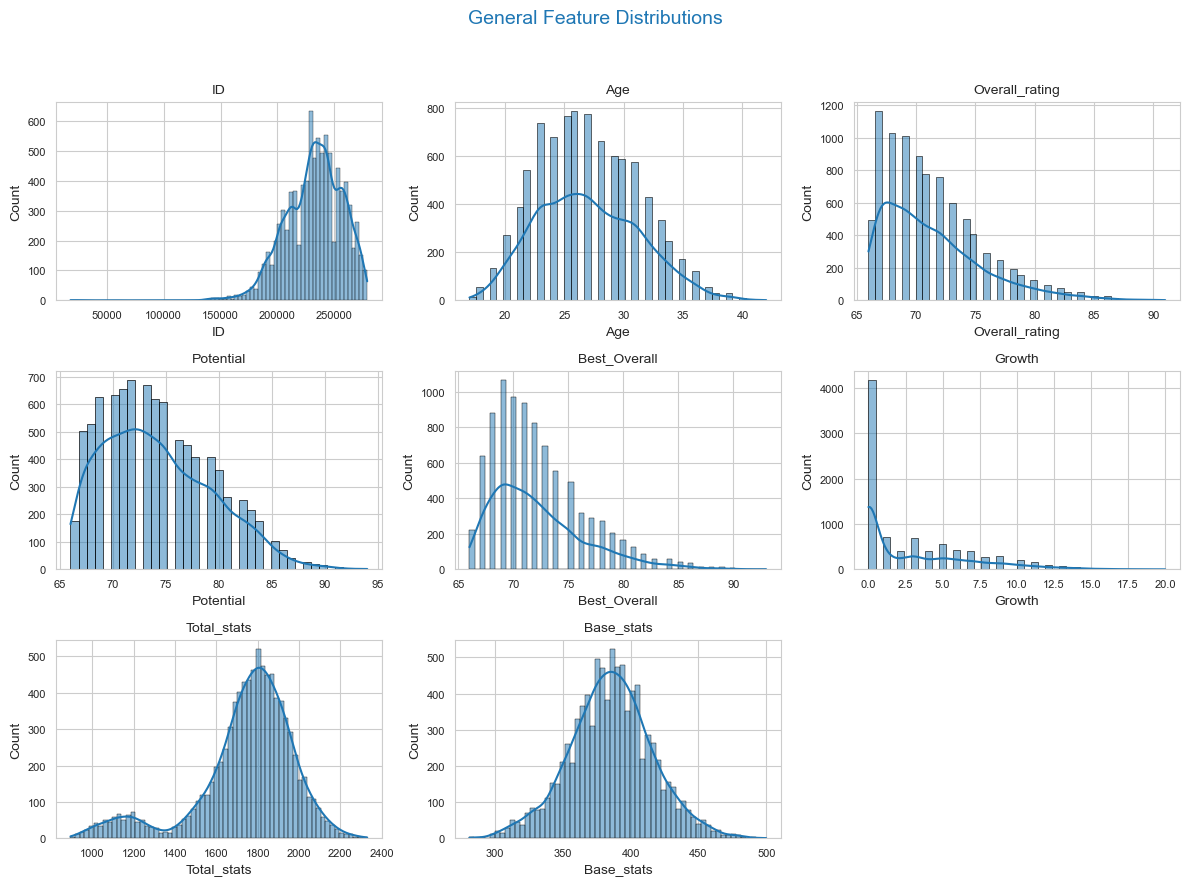

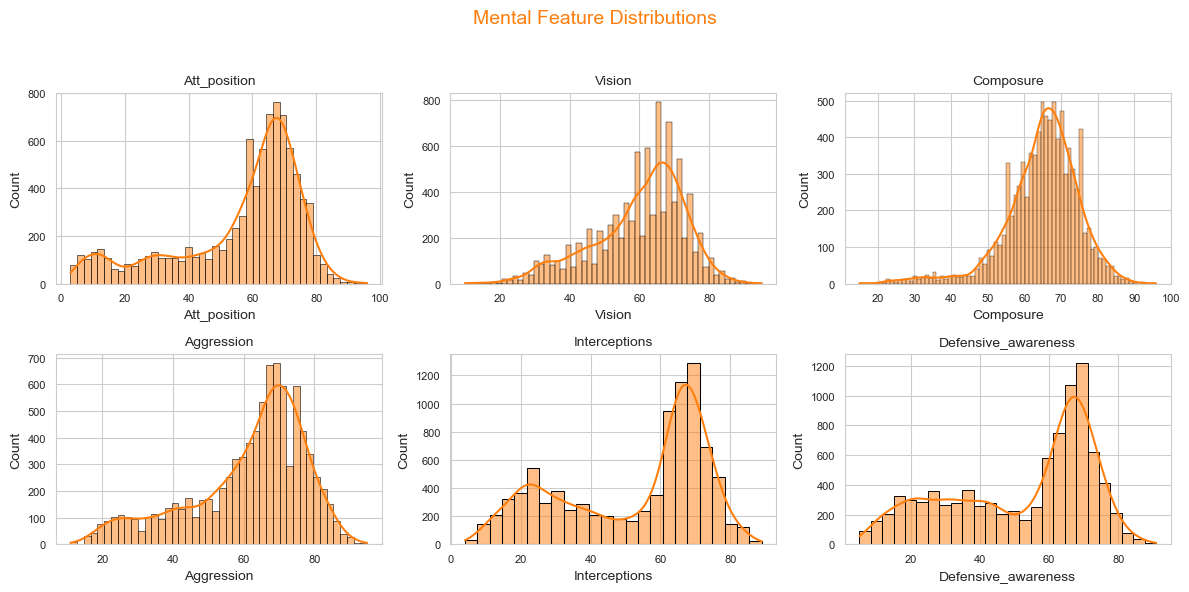

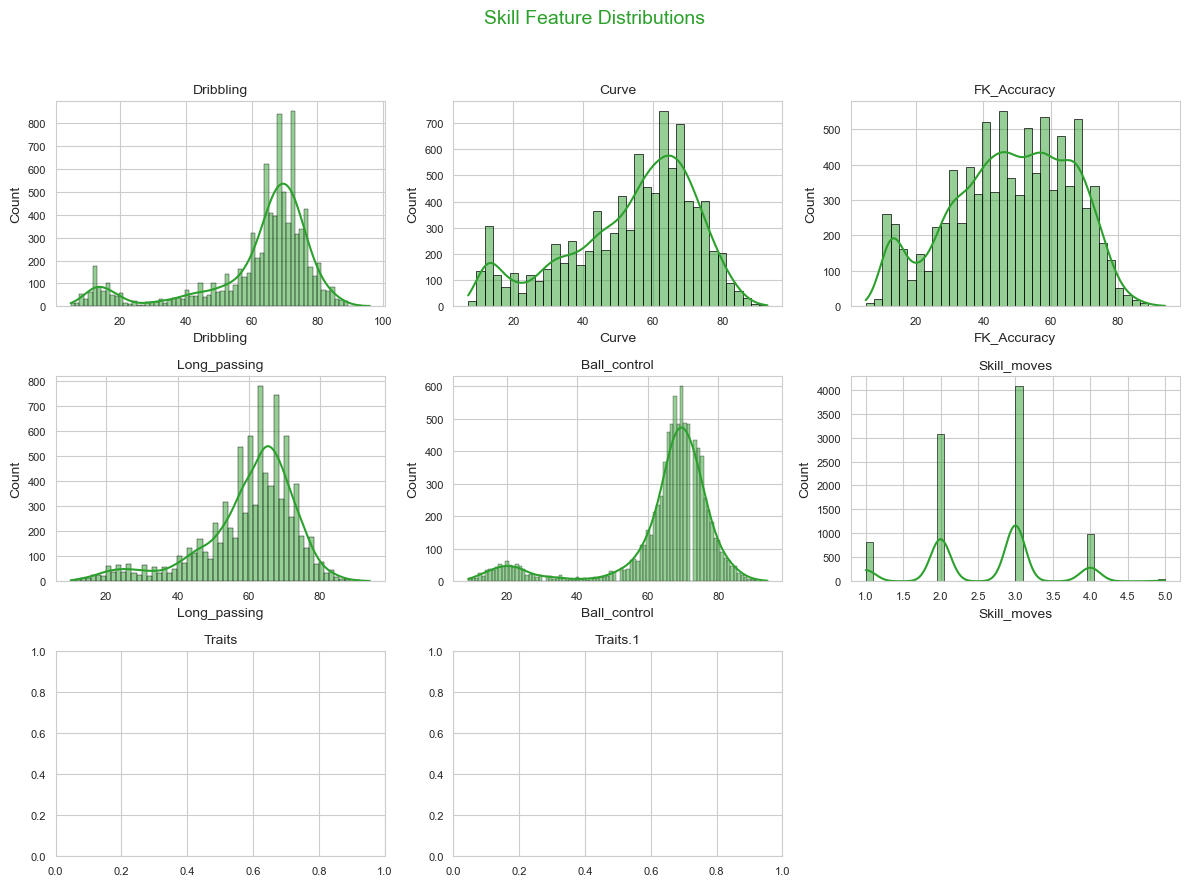

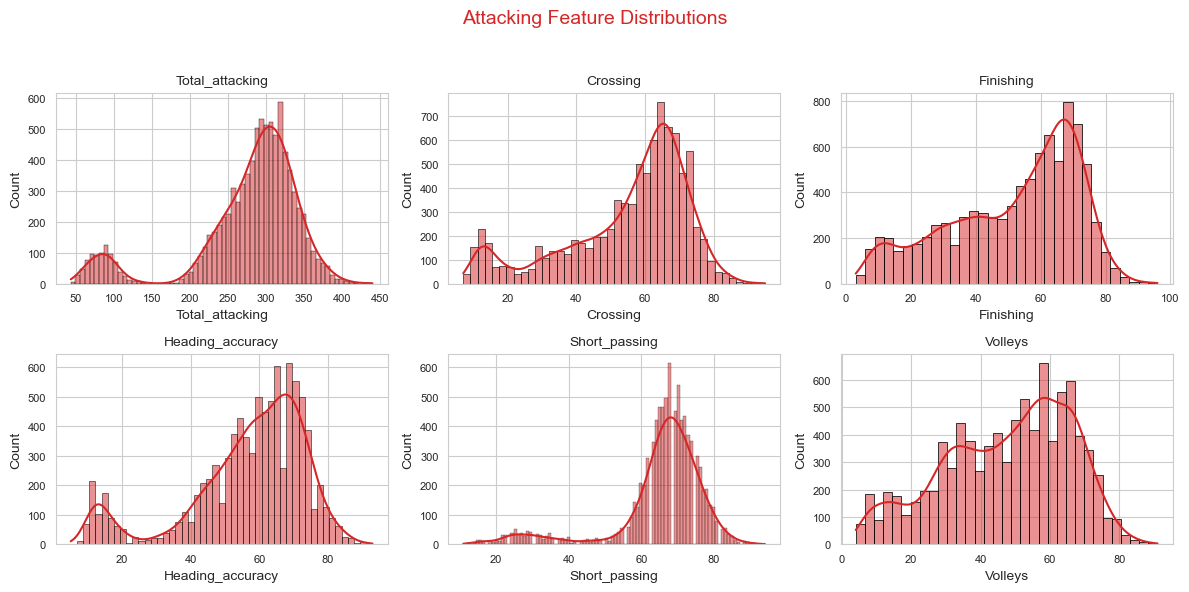

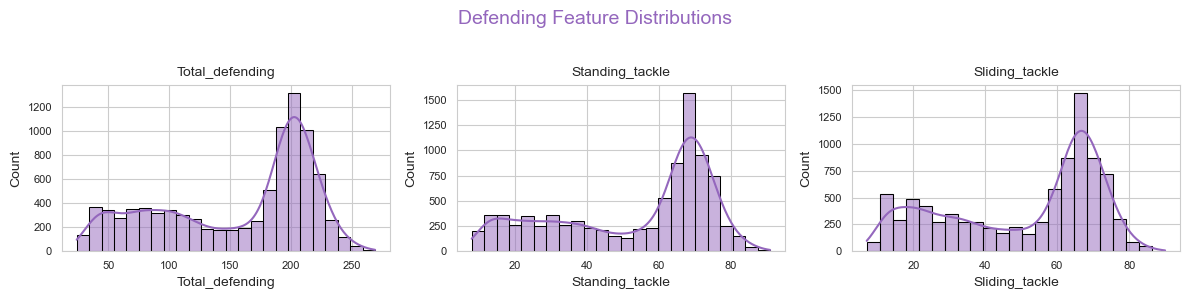

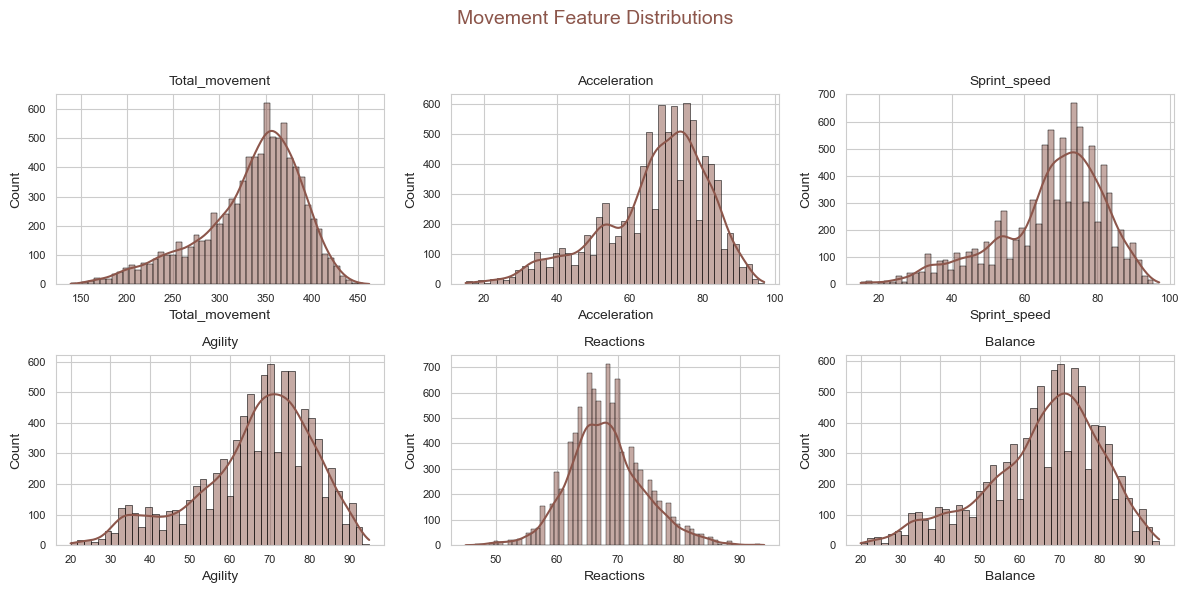

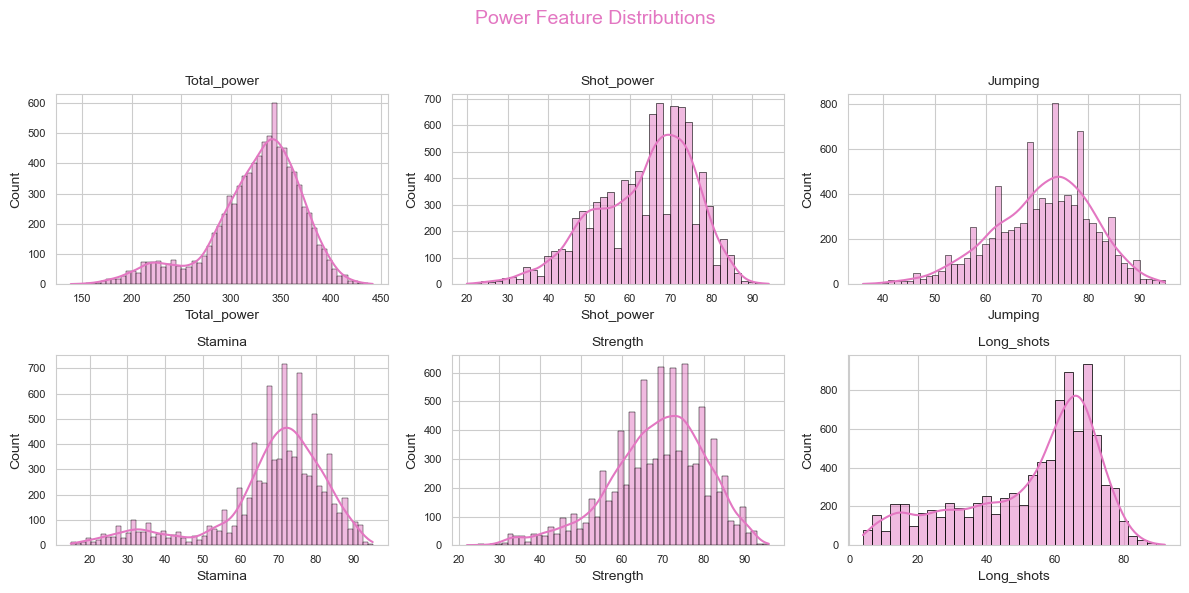

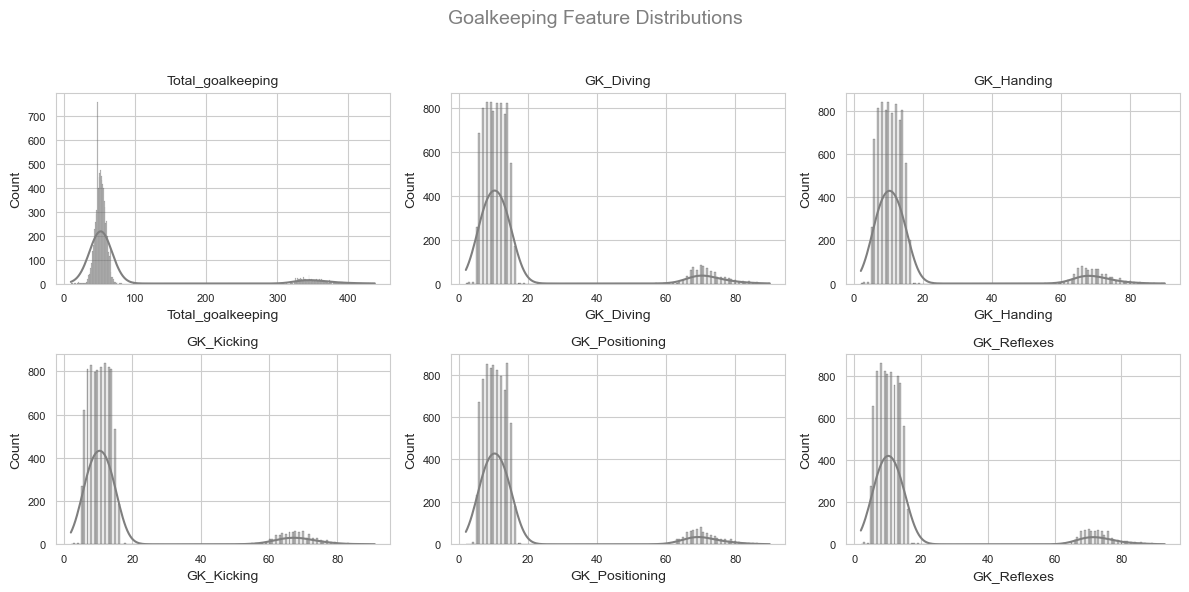

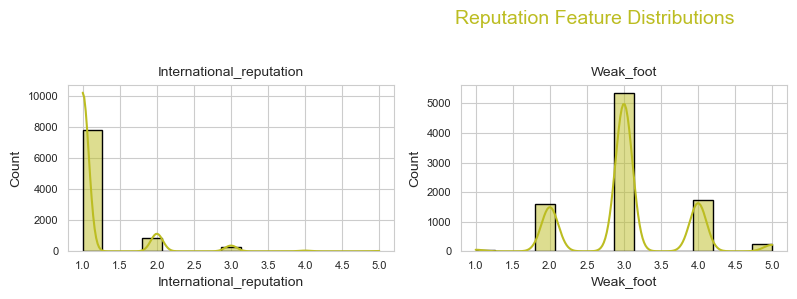

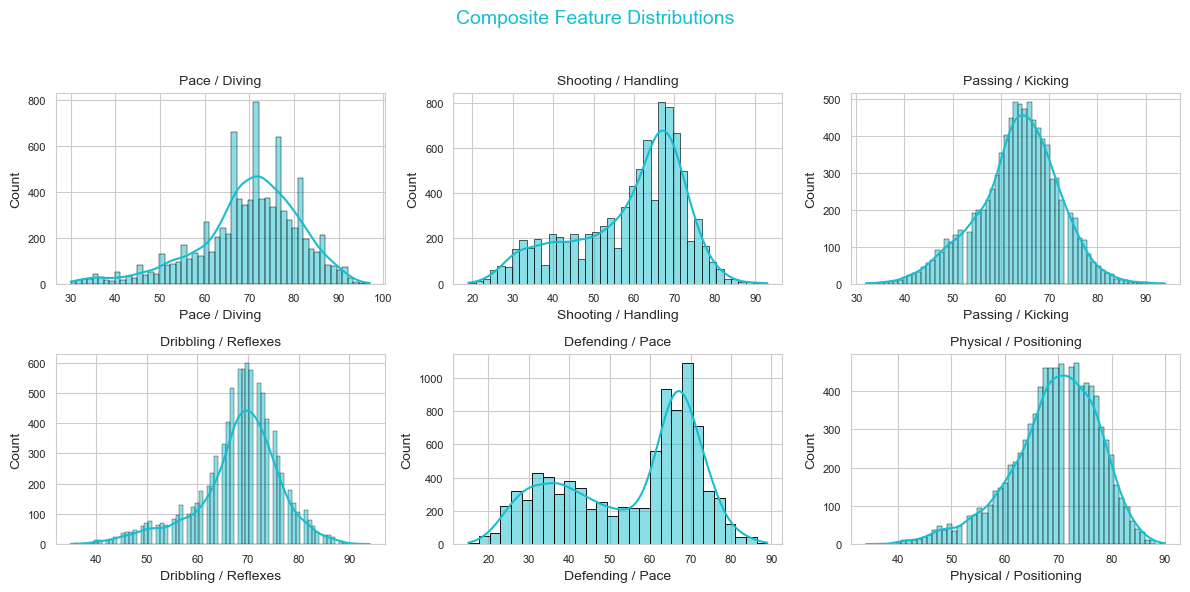

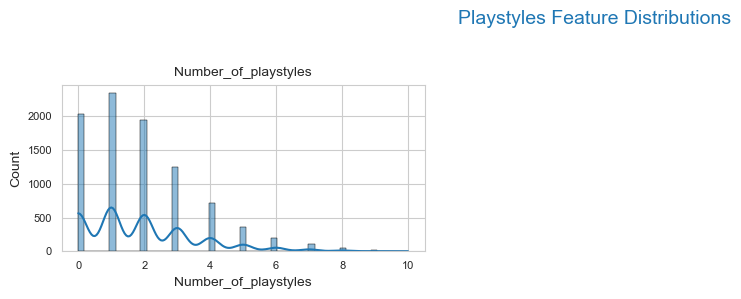

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define numerical features and categories
numerical_features = ['Age', 'Overall_rating', 'Potential', 'ID', 'Best_Overall', 'Growth', 'Total_attacking',
                      'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys', 'Total_skill',
                      'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Total_movement',
                      'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance', 'Total_power',
                      'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression', 'Interceptions',
                      'Att_position', 'Vision', 'Penalties', 'Composure', 'Total_defending',
                      'Defensive_awareness', 'Standing_tackle', 'Sliding_tackle', 'Total_goalkeeping',
                      'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
                      'Base_stats', 'Weak_foot', 'Skill_moves', 'International_reputation', 'Pace / Diving',
                      'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace',
                      'Physical / Positioning', 'Traits', 'Traits.1', 'Number_of_playstyles']

feature_groups = {
    'General': ['ID', 'Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Category-specific color palettes (optional tweak)
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: all features per group side by side
for group_name, features in filtered_feature_groups.items():
    n = len(features)
    cols = 3  # number of subplots per row
    rows = (n + cols - 1) // cols  # compute needed rows

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    fig.suptitle(f'{group_name} Feature Distributions', fontsize=14, color=group_color_map[group_name])
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(df[feature].dropna(), kde=True, ax=axes[i],
                     color=group_color_map[group_name], edgecolor='black')
        axes[i].set_title(feature, fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


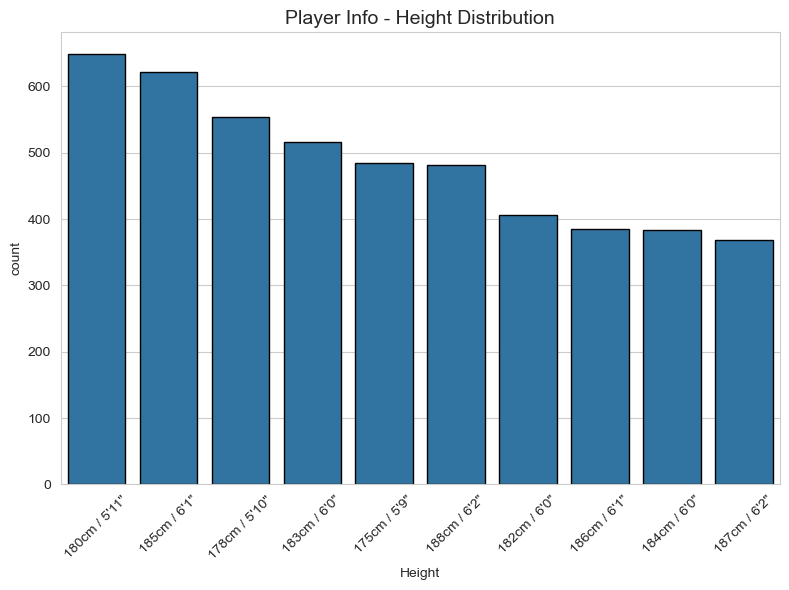

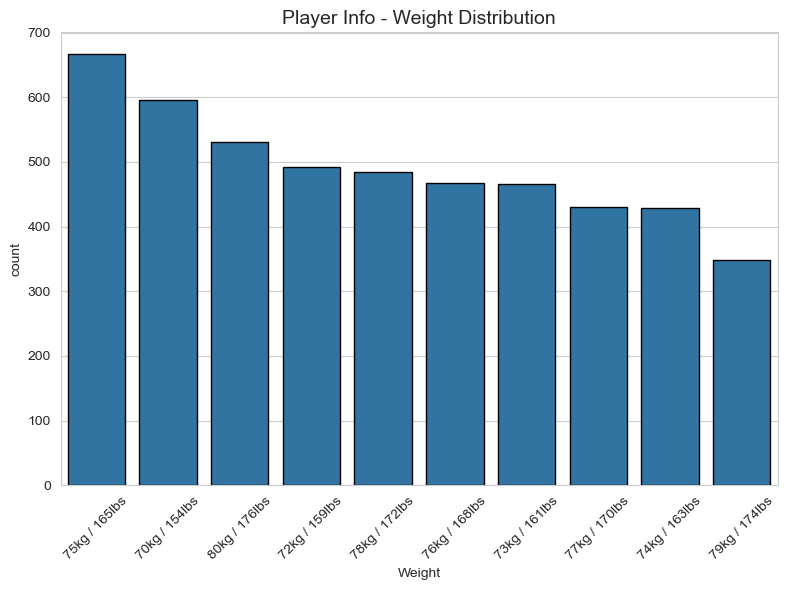

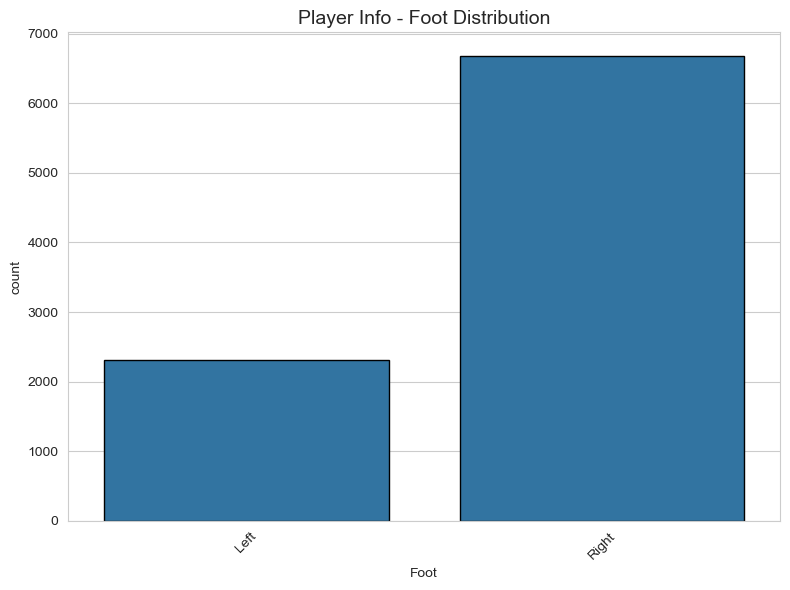

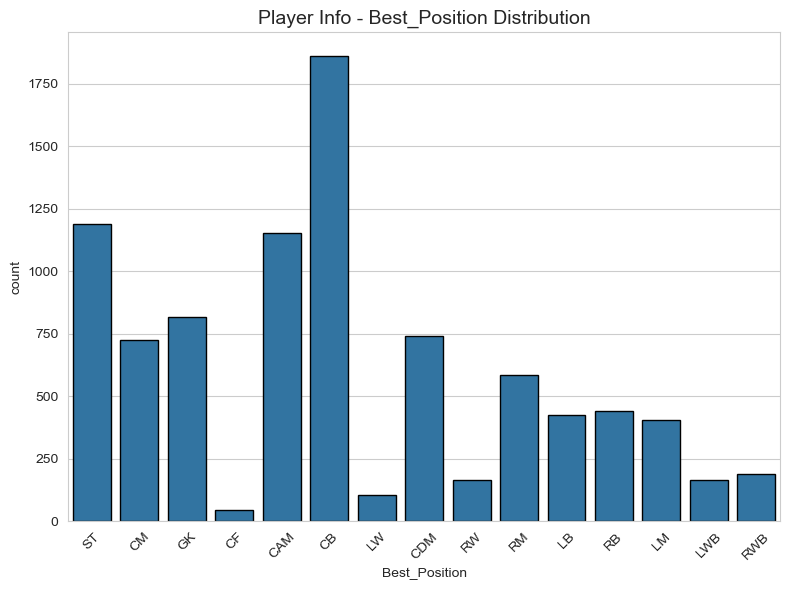

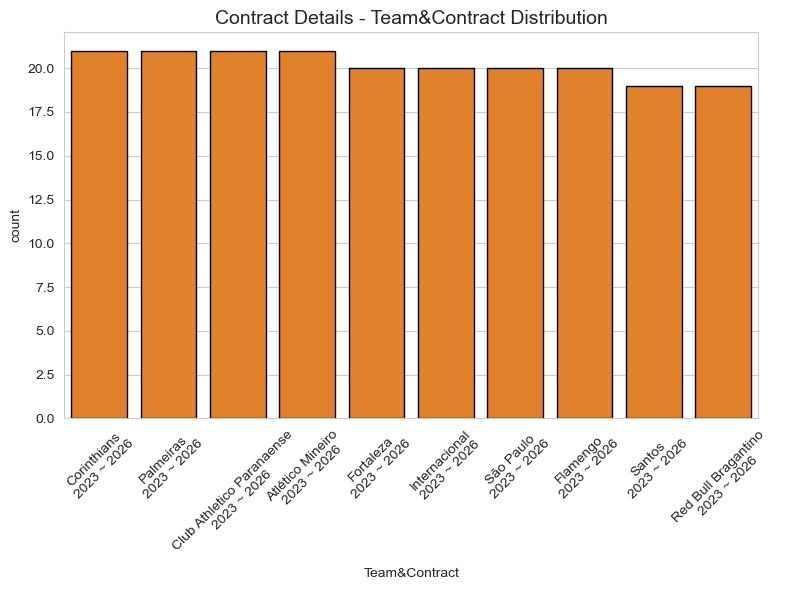

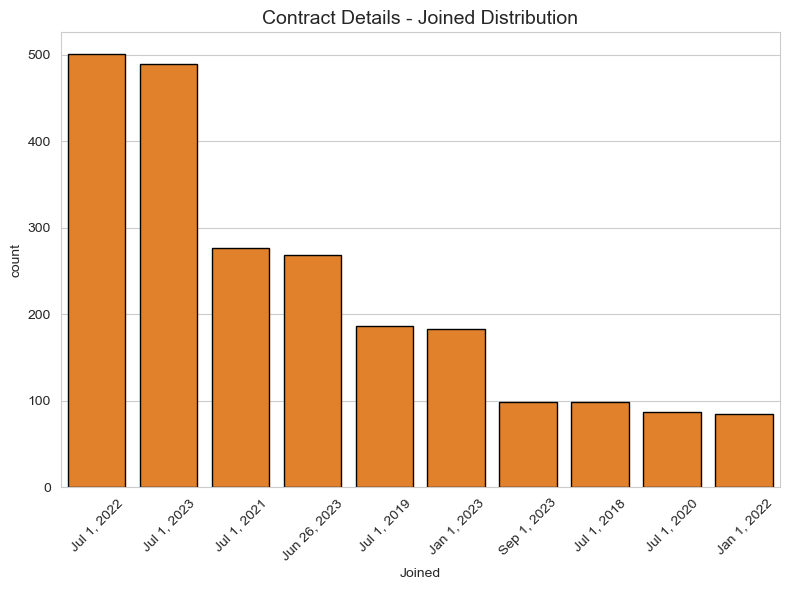

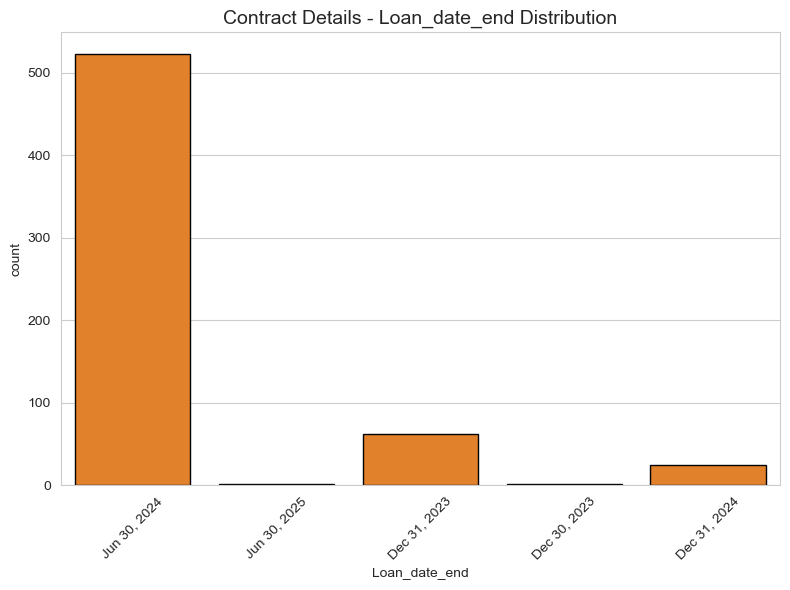

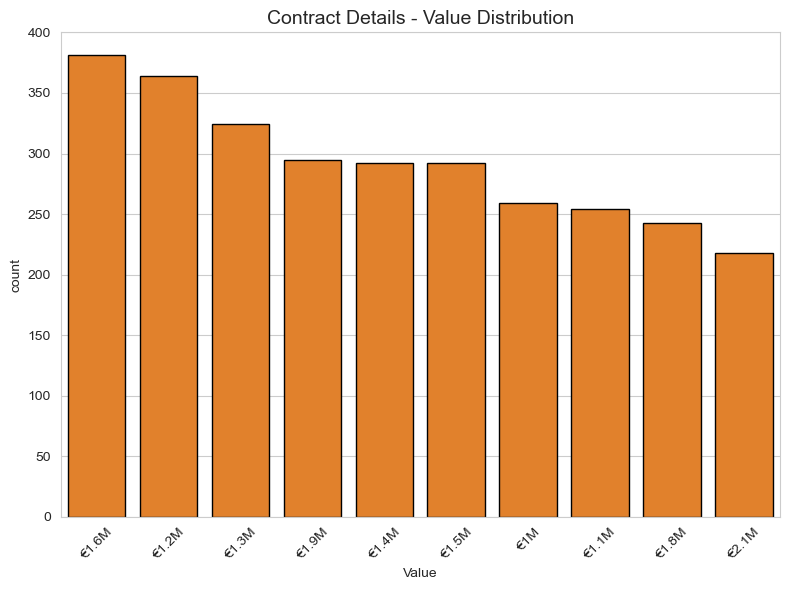

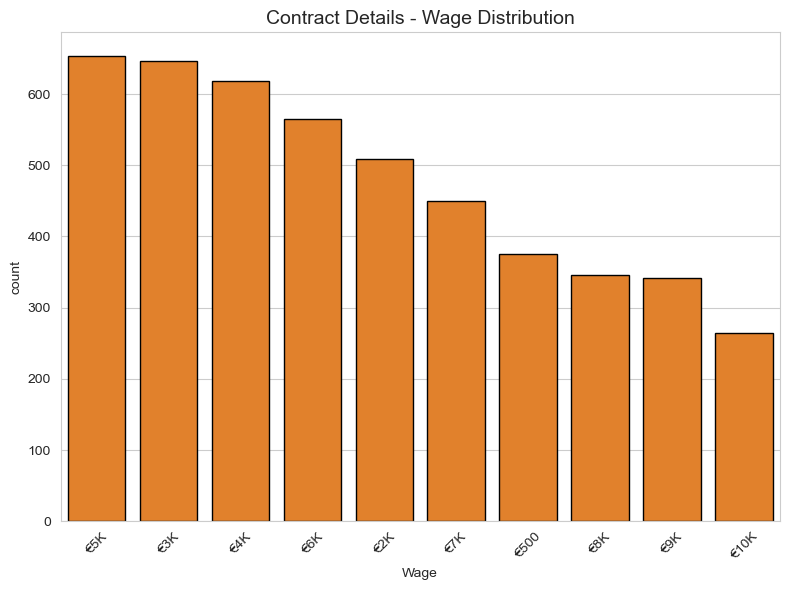

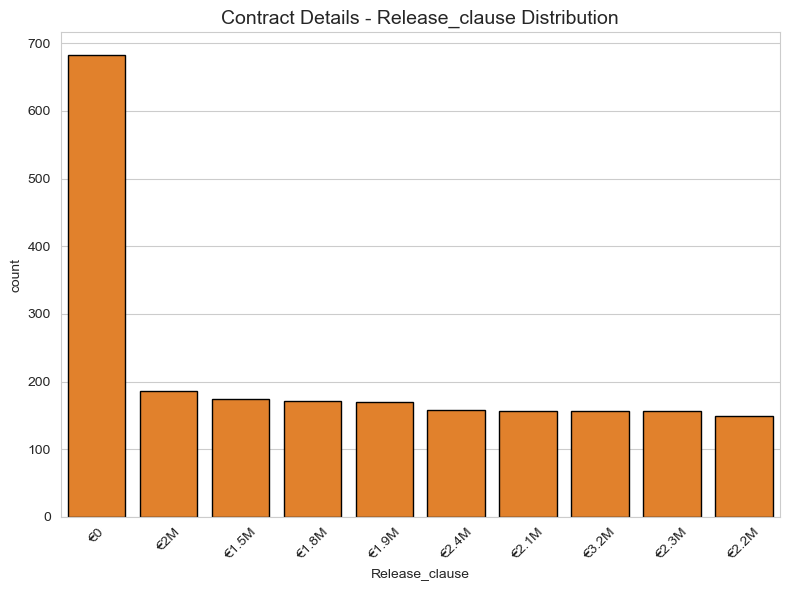

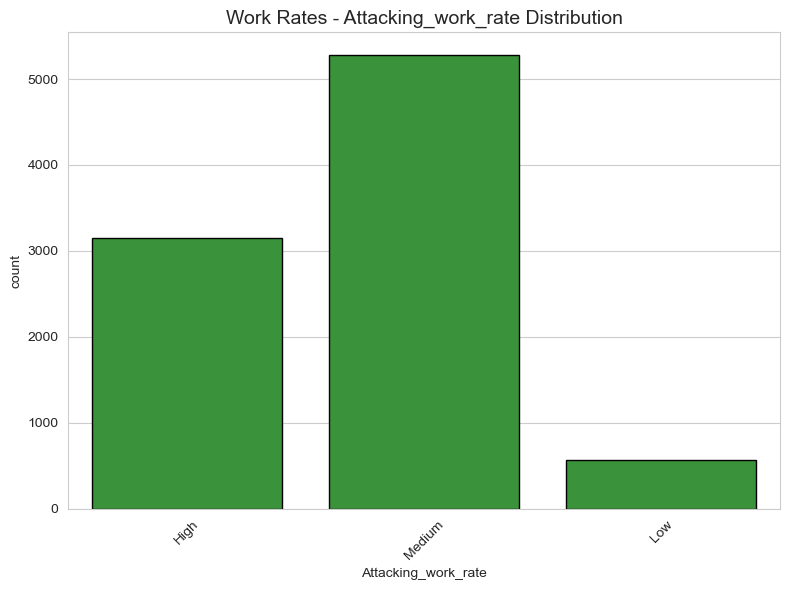

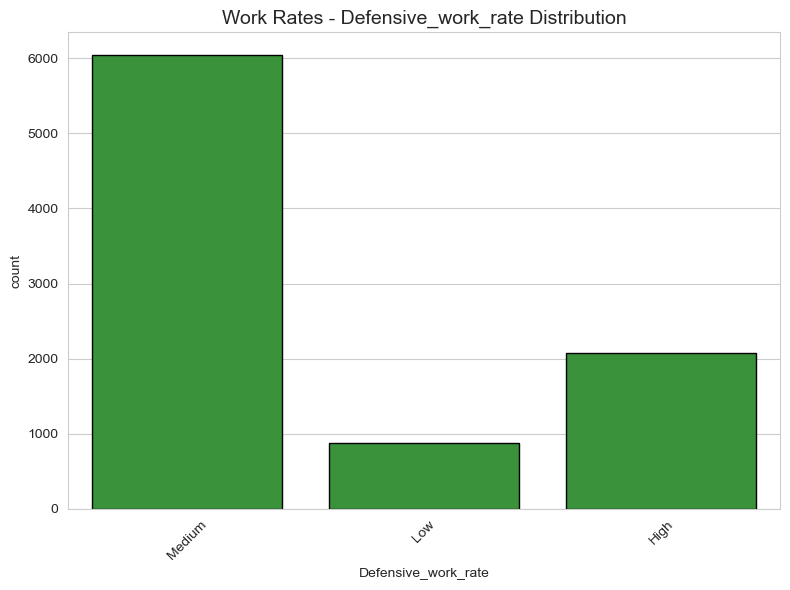

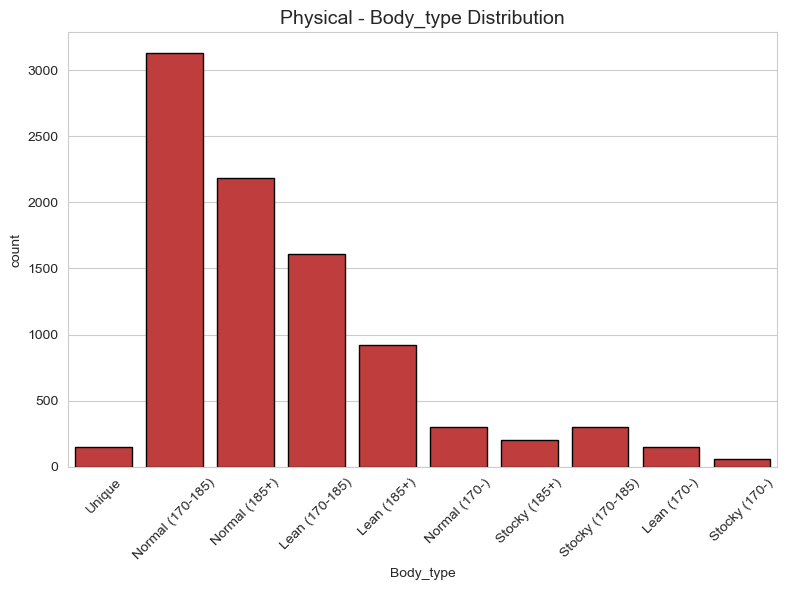

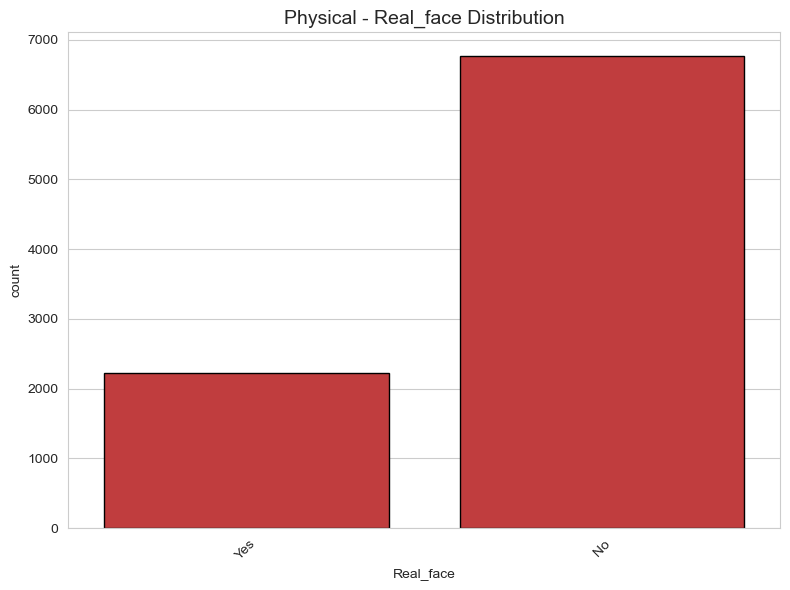

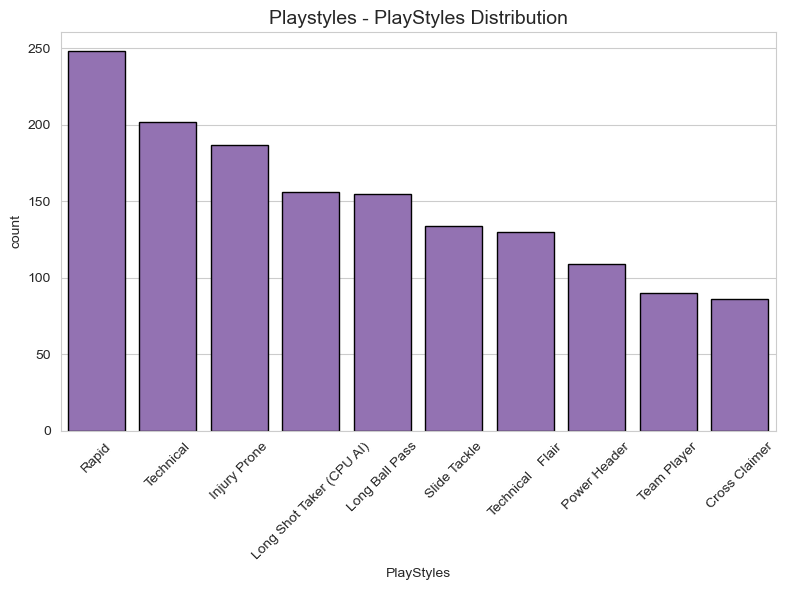

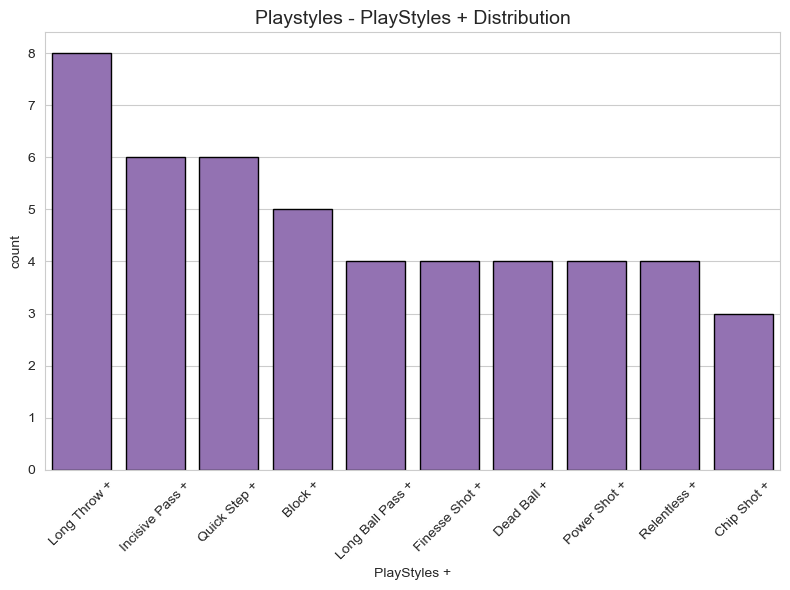

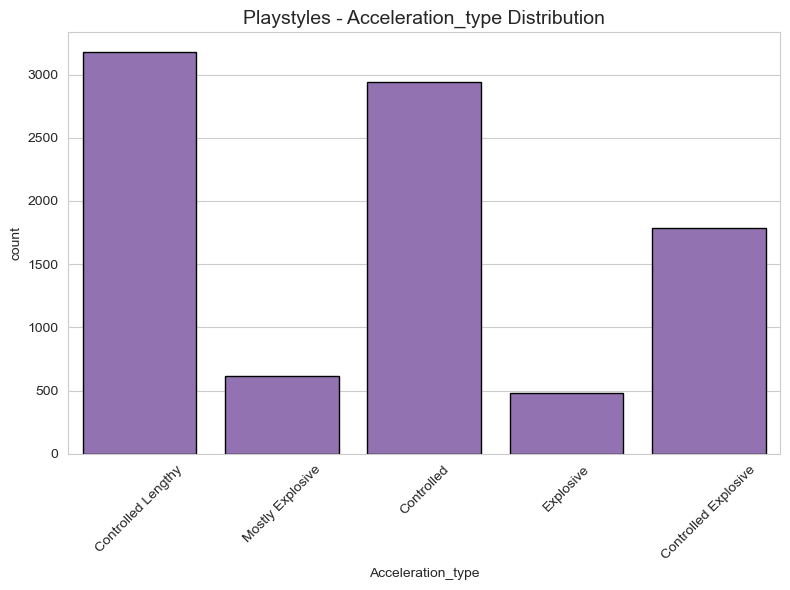

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_style("whitegrid")

# Define categorical features and categories
categorical_features = ['Team&Contract', 'Height', 'Weight', 'Foot', 
                        'Best_Position', 'Joined', 'Loan_date_end', 'Value', 'Wage', 
                        'Release_clause', 'Attacking_work_rate', 'Defensive_work_rate', 
                        'Body_type', 'Real_face', 'PlayStyles', 'PlayStyles +', 'Acceleration_type']

feature_groups = {
    'Player Info': [ 'Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Category-specific color palettes
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Filter features actually in df
filtered_feature_groups = {
    group: [feat for feat in feats if feat in df.columns]
    for group, feats in feature_groups.items()
}

# Plotting: each feature in a separate figure, one under the other
for group_name, features in filtered_feature_groups.items():
    for feature in features:
        # Create a new figure for each plot (one under the other)
        plt.figure(figsize=(8, 6))  # Adjusting the overall figure size
        
        # Only show the top 10 categories if there are more than 20 unique categories
        if df[feature].nunique() > 20:
            top_categories = df[feature].value_counts().nlargest(10).index
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black', order=top_categories)
        else:
            sns.countplot(x=df[feature], palette=[group_color_map[group_name]], edgecolor='black')
        
        plt.title(f'{group_name} - {feature} Distribution', fontsize=14)
        plt.tick_params(axis='x', labelsize=10, rotation=45)  # Rotate x-axis labels if needed
        plt.tick_params(axis='y', labelsize=10)
        plt.tight_layout()
        plt.show()


In [10]:
# Dropping the specified columns from the DataFrame
df = df.drop(columns=['Image_URL', 'Name', 'ID', 'Traits', 'Traits.1'])

# Verify that the columns have been dropped
print(df.columns)


Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Skill_moves', 'Attacking_work_rate',
       'Defensive_work_rate', 'International_r

In [11]:
import pandas as pd

# Replace missing values in numerical columns with the mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Replace missing values in categorical columns with the most frequent value (mode)
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Confirm that missing values are replaced
print("Missing values after replacement:")
print(df.isnull().sum())


Missing values after replacement:
Age                       0
Overall_rating            0
Potential                 0
Team&Contract             0
Height                    0
                         ..
Physical / Positioning    0
PlayStyles                0
PlayStyles +              0
Number_of_playstyles      0
Acceleration_type         0
Length: 74, dtype: int64


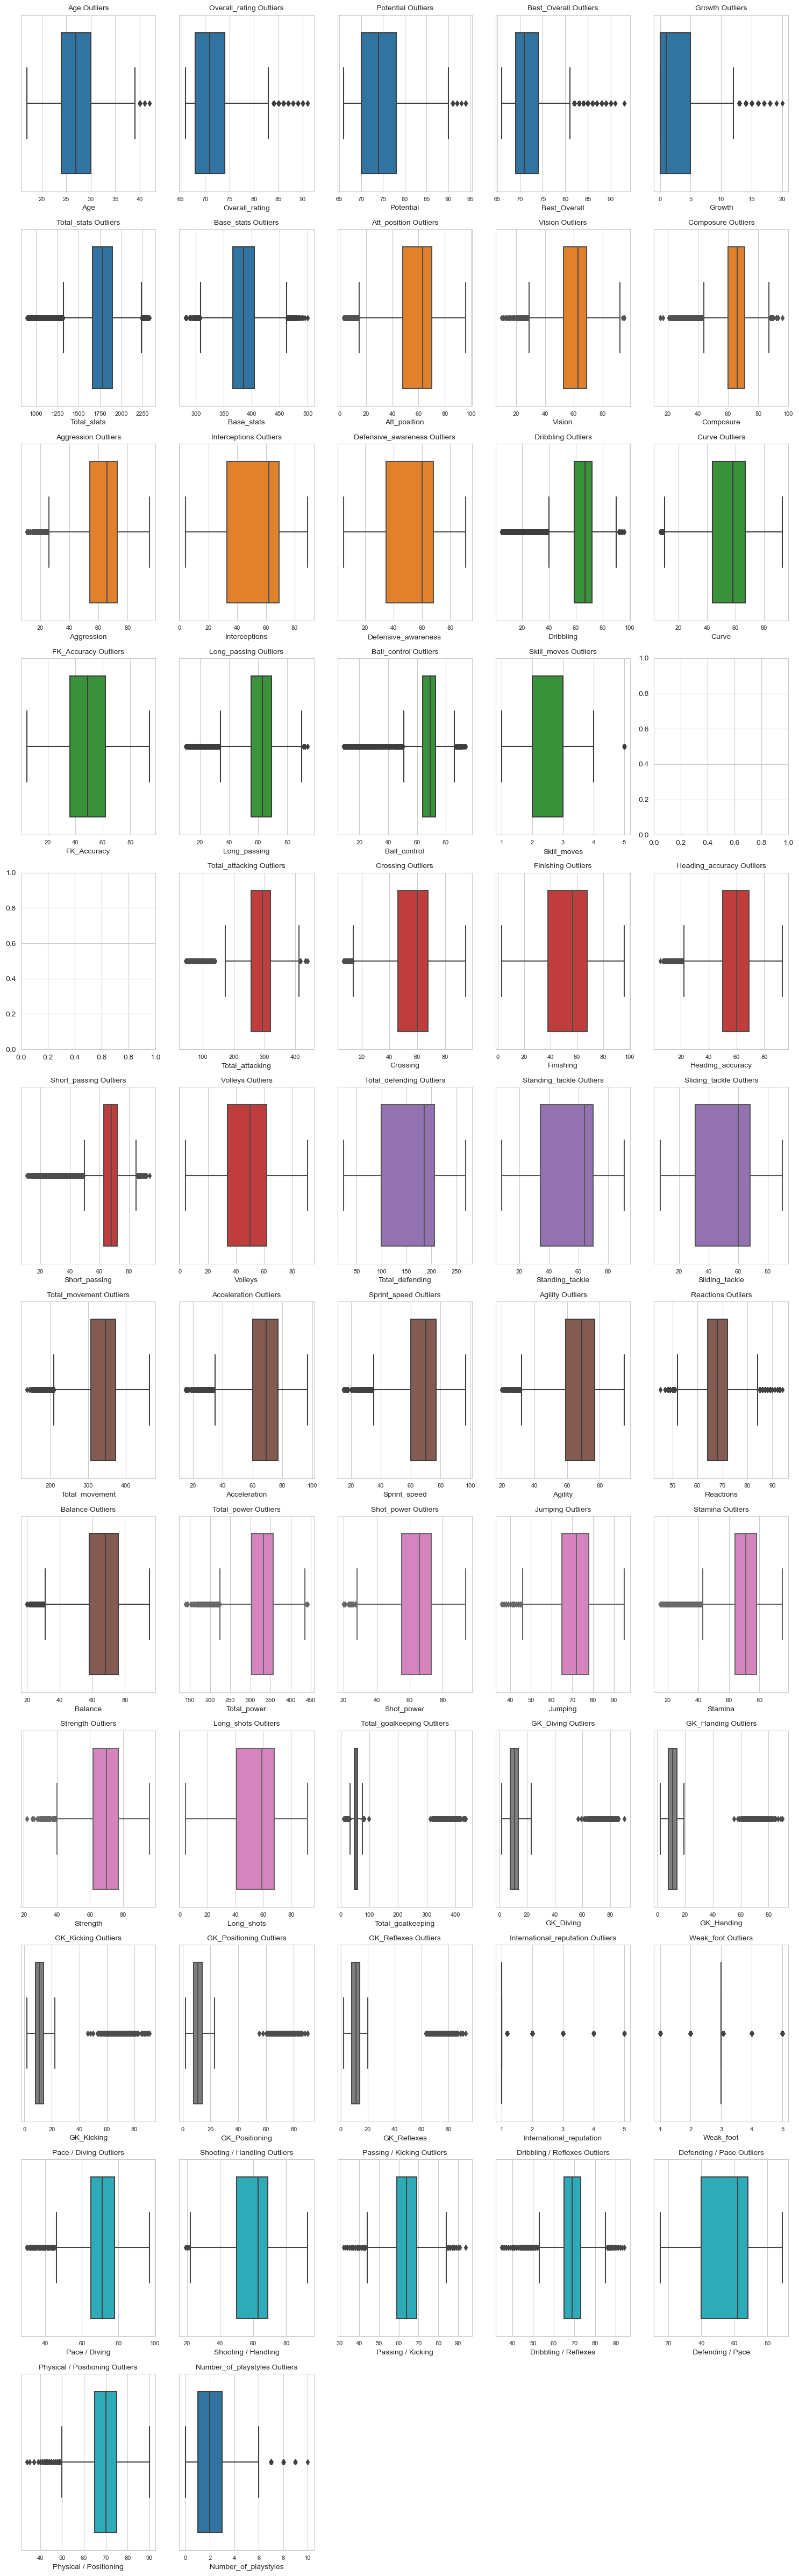

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data


# Feature groups as per your request
feature_groups = {
   'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Calculate grid dimensions dynamically based on the number of features
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break
        
        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


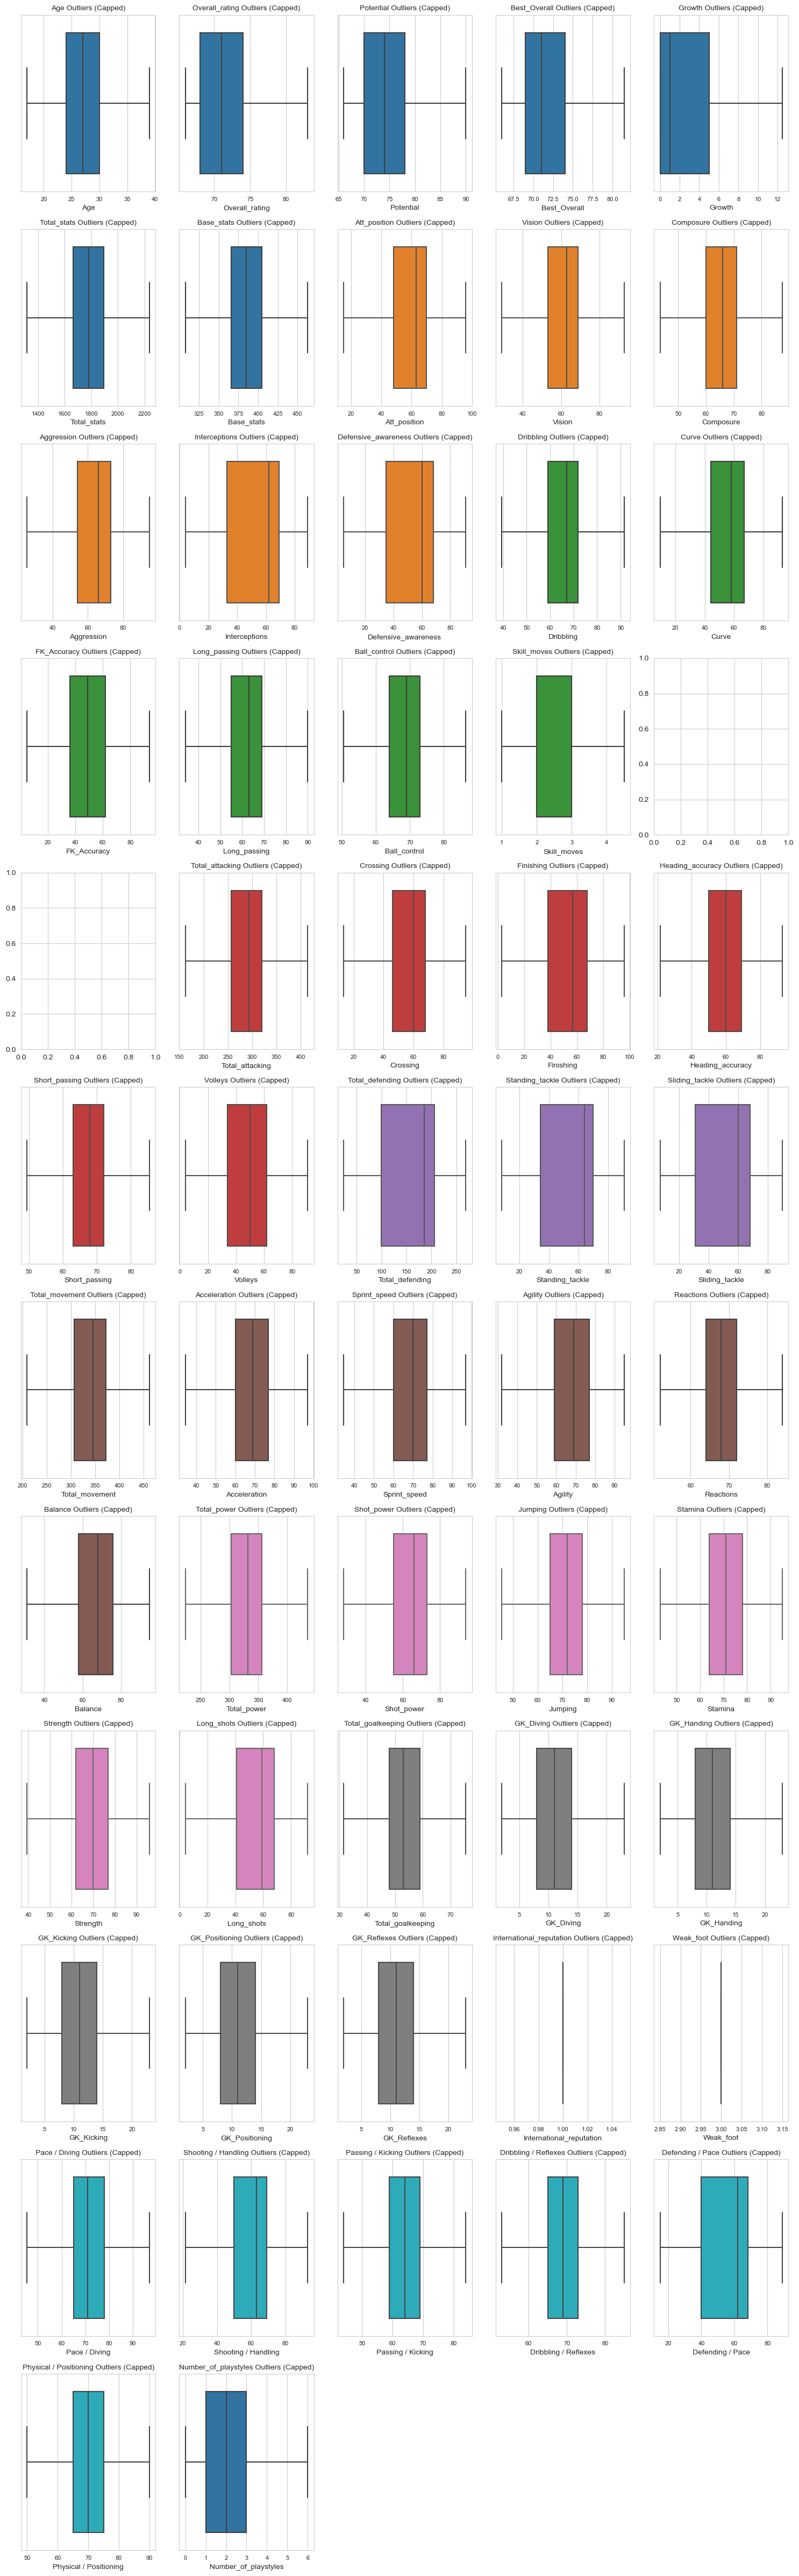

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame with the data

# Feature groups as per your request
feature_groups = {
    'General': ['Age', 'Overall_rating', 'Potential', 'Best_Overall', 'Growth', 'Total_stats', 'Base_stats'],
    'Mental': ['Att_position', 'Vision', 'Composure', 'Aggression', 'Interceptions', 'Defensive_awareness'],
    'Skill': ['Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing', 'Ball_control', 'Skill_moves', 'Traits', 'Traits.1'],
    'Attacking': ['Total_attacking', 'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys'],
    'Defending': ['Total_defending', 'Standing_tackle', 'Sliding_tackle'],
    'Movement': ['Total_movement', 'Acceleration', 'Sprint_speed', 'Agility', 'Reactions', 'Balance'],
    'Power': ['Total_power', 'Shot_power', 'Jumping', 'Stamina', 'Strength', 'Long_shots'],
    'Goalkeeping': ['Total_goalkeeping', 'GK_Diving', 'GK_Handing', 'GK_Kicking', 'GK_Positioning', 'GK_Reflexes'],
    'Reputation': ['International_reputation', 'Weak_foot'],
    'Composite': ['Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes',
                  'Defending / Pace', 'Physical / Positioning'],
    'Playstyles': ['Number_of_playstyles']
}

# Flatten the list of all features
all_features = [feat for feats in feature_groups.values() for feat in feats]

# Color Palette for the feature groups
group_colors = sns.color_palette("tab10", n_colors=len(feature_groups))
group_color_map = dict(zip(feature_groups.keys(), group_colors))

# Function for capping outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)
    return df

# Apply capping to outliers for each feature
for feature in all_features:
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        df = cap_outliers(df, feature)

# Replot the boxplots after capping outliers
n_features = len(all_features)
n_cols = 5  # Number of columns in the grid
n_rows = np.ceil(n_features / n_cols).astype(int)  # Number of rows (rounded up)

# Define the grid for plotting
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust height for larger number of rows
axes = axes.flatten()  # Flatten axes to iterate over

# Loop through the features and create boxplots
for i, feature in enumerate(all_features):
    if feature in df.columns:  # Ensure the feature exists in the dataframe
        # Find the group that the feature belongs to
        group_name = None
        for group, features in feature_groups.items():
            if feature in features:
                group_name = group
                break
        
        # Ensure we do not exceed the number of axes available
        if i < len(axes):
            sns.boxplot(x=df[feature], color=group_color_map[group_name], ax=axes[i])
            axes[i].set_title(f'{feature} Outliers (Capped)', fontsize=10)
            axes[i].tick_params(axis='x', labelsize=8)
            axes[i].tick_params(axis='y', labelsize=8)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [14]:
# Check for duplicated column names
duplicated_columns = df.columns[df.columns.duplicated()].unique()

# Display the duplicated columns
print(f"Duplicated columns: {duplicated_columns}")

# If you want to drop duplicated columns (keeping the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

# Verify the columns after dropping duplicates
print(f"Columns after removing duplicates: {df.columns}")


Duplicated columns: Index([], dtype='object')
Columns after removing duplicates: Index(['Age', 'Overall_rating', 'Potential', 'Team&Contract', 'Height',
       'Weight', 'Foot', 'Best_Overall', 'Best_Position', 'Growth', 'Joined',
       'Loan_date_end', 'Value', 'Wage', 'Release_clause', 'Total_attacking',
       'Crossing', 'Finishing', 'Heading_accuracy', 'Short_passing', 'Volleys',
       'Total_skill', 'Dribbling', 'Curve', 'FK_Accuracy', 'Long_passing',
       'Ball_control', 'Total_movement', 'Acceleration', 'Sprint_speed',
       'Agility', 'Reactions', 'Balance', 'Total_power', 'Shot_power',
       'Jumping', 'Stamina', 'Strength', 'Long_shots', 'Aggression',
       'Interceptions', 'Att_position', 'Vision', 'Penalties', 'Composure',
       'Total_defending', 'Defensive_awareness', 'Standing_tackle',
       'Sliding_tackle', 'Total_goalkeeping', 'GK_Diving', 'GK_Handing',
       'GK_Kicking', 'GK_Positioning', 'GK_Reflexes', 'Total_stats',
       'Base_stats', 'Weak_foot', 'Sk

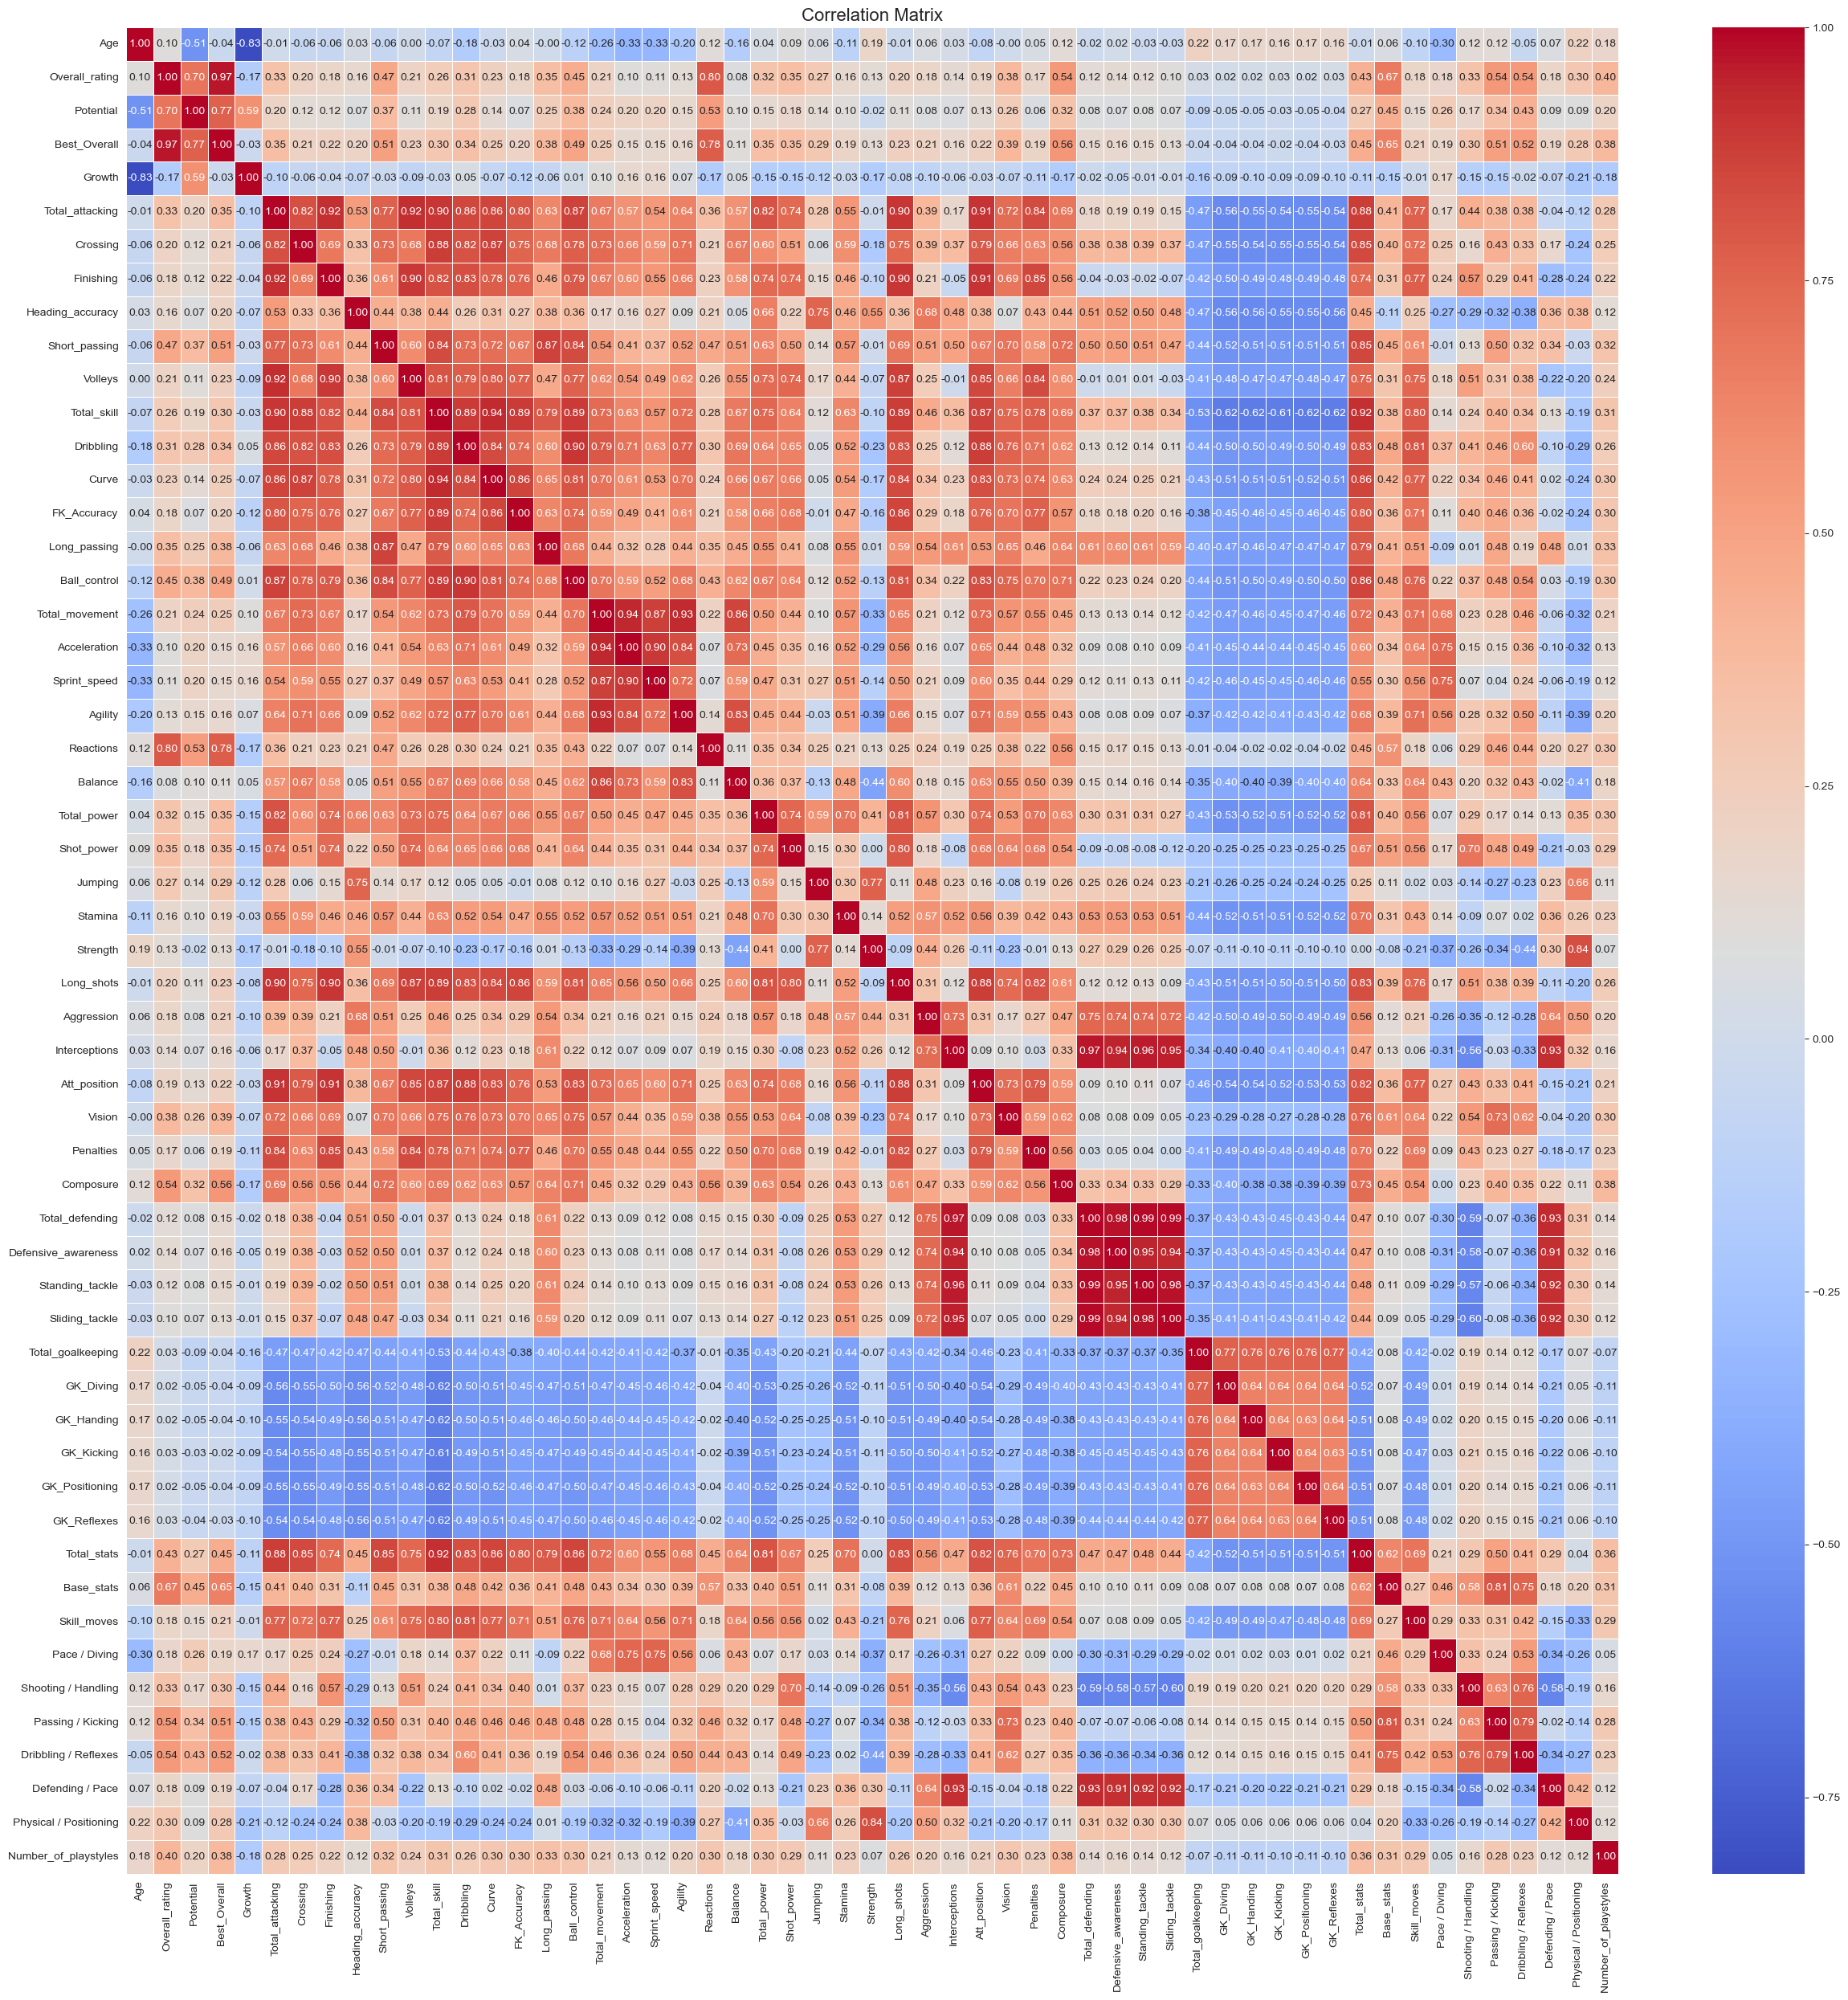

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Drop 'International_reputation' and 'Weak_foot' from the numeric columns
numeric_df = numeric_df.drop(columns=['International_reputation', 'Weak_foot'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 25))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Your feature groups containing categorical features
feature_groups = {
    'Player Info': ['Height', 'Weight', 'Foot', 'Best_Position'],
    'Contract Details': ['Team&Contract', 'Joined', 'Loan_date_end', 'Value', 'Wage', 'Release_clause'],
    'Work Rates': ['Attacking_work_rate', 'Defensive_work_rate'],
    'Physical': ['Body_type', 'Real_face'],
    'Playstyles': ['PlayStyles', 'PlayStyles +', 'Acceleration_type']
}

# Flatten the list of categorical features
categorical_features = [feat for feats in feature_groups.values() for feat in feats]

# Label encoding for categorical features
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for feature in categorical_features:
    if feature in df.columns:
        df[feature] = label_encoder.fit_transform(df[feature])

# Show a snippet of the transformed DataFrame
print(df[categorical_features].head())


   Height  Weight  Foot  Best_Position  Team&Contract  Joined  Loan_date_end  \
0      23      26     1              1            587     692              3   
1      38      45     0             14           3080     692              3   
2      25      26     1             14           3534     688              3   
3      24      26     1              4           3069     209              3   
4      31      36     1             14           1728      91              3   

   Value  Wage  Release_clause  Attacking_work_rate  Defensive_work_rate  \
0      6    88               0                    2                    2   
1     48    56             357                    0                    2   
2     47    38             347                    0                    1   
3     15    58             163                    0                    2   
4     24    22             167                    0                    0   

   Body_type  Real_face  PlayStyles  PlayStyles +  Acceleratio

In [17]:
from sklearn.preprocessing import MinMaxScaler

# If you want to normalize encoded columns (not always necessary for categorical features)
scaler = MinMaxScaler()

# Apply MinMaxScaler to scale features to the range [0, 1]
df[categorical_features] = scaler.fit_transform(df[categorical_features])

# Show a snippet of the normalized DataFrame
print(df[categorical_features].head())


     Height  Weight  Foot  Best_Position  Team&Contract    Joined  \
0  0.489362    0.52   1.0       0.071429       0.108263  0.480556   
1  0.808511    0.90   0.0       1.000000       0.568056  0.480556   
2  0.531915    0.52   1.0       1.000000       0.651789  0.477778   
3  0.510638    0.52   1.0       0.285714       0.566027  0.145139   
4  0.659574    0.72   1.0       1.000000       0.318702  0.063194   

   Loan_date_end     Value      Wage  Release_clause  Attacking_work_rate  \
0           0.75  0.025862  0.666667        0.000000                  1.0   
1           0.75  0.206897  0.424242        0.442379                  0.0   
2           0.75  0.202586  0.287879        0.429988                  0.0   
3           0.75  0.064655  0.439394        0.201983                  0.0   
4           0.75  0.103448  0.166667        0.206939                  0.0   

   Defensive_work_rate  Body_type  Real_face  PlayStyles  PlayStyles +  \
0                  1.0   0.444444        0.0    

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# 1. Separate features and target
X = df.drop(columns=["Value"])
y = df["Value"]

# 2. Feature Selection using RandomForest importance
rf_selector = RandomForestRegressor(random_state=42)
rf_selector.fit(X, y)

# Get feature importances
importances = rf_selector.feature_importances_
feature_names = X.columns
feature_scores = pd.Series(importances, index=feature_names).sort_values(ascending=False)



In [19]:
# Show top 15 features (you can change the number)
top_features = feature_scores.head(15).index
print("Top selected features:\n", top_features)

# Filter dataset with selected features
X_selected = X[top_features]


Top selected features:
 Index(['Release_clause', 'Potential', 'Age', 'Overall_rating', 'Best_Overall',
       'Wage', 'Joined', 'Team&Contract', 'Growth', 'Att_position',
       'Reactions', 'Total_defending', 'PlayStyles', 'Composure', 'Weight'],
      dtype='object')


In [20]:
# 3. Split into train/test sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

📊 Evaluation Metrics:
RMSE: 0.1452
MAE: 0.0752
R² Score: 0.7866


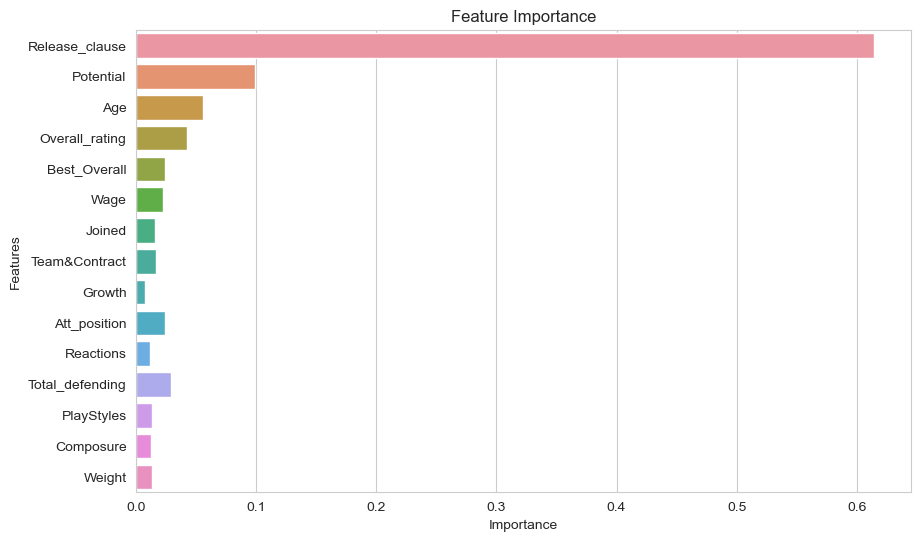

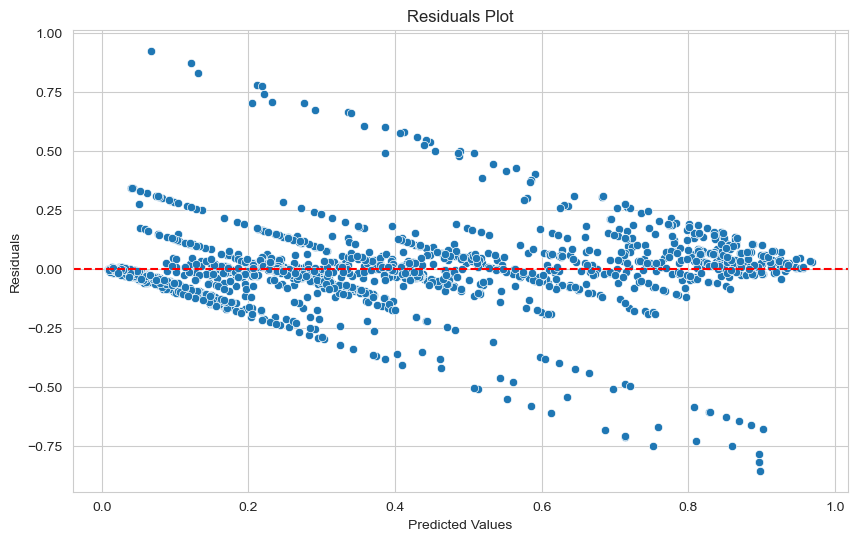

C:\Users\ameni\AppData\Local\Temp\ipykernel_38396\647054607.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='r')


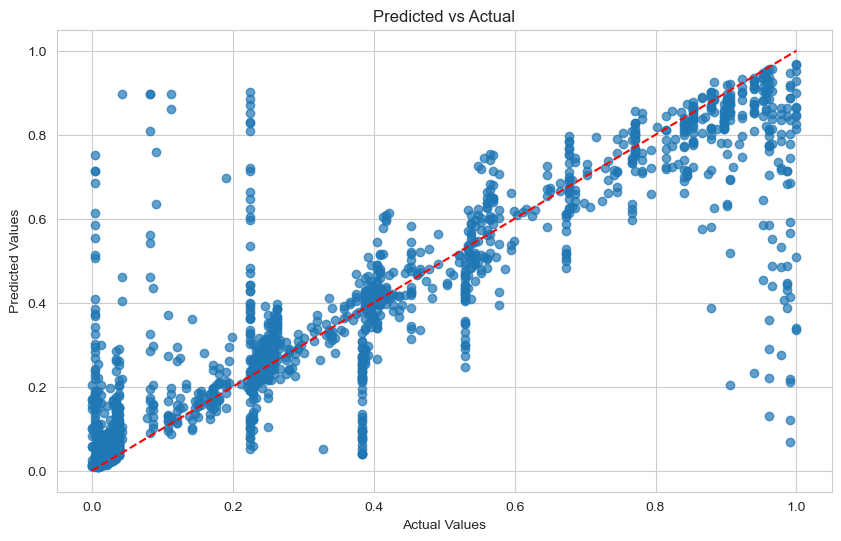

Cross-Validation RMSE: Mean=0.1363, Std=0.0065


In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model using the best parameters
best_model = grid_search.best_estimator_

# Step 2: Predict and evaluate the model
y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"\n📊 Evaluation Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 3: Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=X_train.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Step 4: Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Step 5: Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', color='r')
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Step 6: Cross-Validation Scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)  # RMSE
print(f"Cross-Validation RMSE: Mean={cv_rmse.mean():.4f}, Std={cv_rmse.std():.4f}")


In [52]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

# 🌟 Extended hyperparameter tuning
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
}

# Randomized search for more efficient hyperparameter search
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_distributions=params,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit random search
random_search.fit(X_train, y_train)

# Best model
model_xgb = random_search.best_estimator_


# 📈 Predict and evaluate
y_pred_xgb = model_xgb.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# 🧾 Résultats
print("📊 XGBoost Evaluation Metrics (Optimized with RandomizedSearchCV):")
print(f"📉 RMSE : {rmse_xgb:.4f}")
print(f"📉 MAE  : {mae_xgb:.4f}")
print(f"📈 R²    : {r2_xgb:.4f}")
print(f"⚙️  Best Params : {random_search.best_params_}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
📊 XGBoost Evaluation Metrics (Optimized with RandomizedSearchCV):
📉 RMSE : 0.1298
📉 MAE  : 0.0681
📈 R²    : 0.8293
⚙️  Best Params : {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🌟 Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV
grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

# 🔧 Fit the grid search
grid.fit(X_train, y_train)

# 🧠 Best model
model_gb = grid.best_estimator_

# ✅ Train the best model
model_gb.fit(X_train, y_train)

# 📈 Predict and evaluate
y_pred_gb = model_gb.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# 📊 Results
print(f"📊 Gradient Boosting Evaluation Metrics (Optimized):")
print(f"📉 RMSE : {rmse_gb:.4f}")
print(f"📉 MAE  : {mae_gb:.4f}")
print(f"📈 R²    : {r2_gb:.4f}")
print(f"⚙️  Best Params : {grid.best_params_}")


📊 Gradient Boosting Evaluation Metrics (Optimized):
📉 RMSE : 0.1417
📉 MAE  : 0.0834
📈 R²    : 0.7966
⚙️  Best Params : {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 1.0}


C:\Users\ameni\AppData\Local\Temp\ipykernel_38396\76655410.py:32: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\ameni\AppData\Local\Temp\ipykernel_38396\76655410.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\ameni\AppData\Local\Temp\ipykernel_38396\76655410.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\ameni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ameni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ameni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12

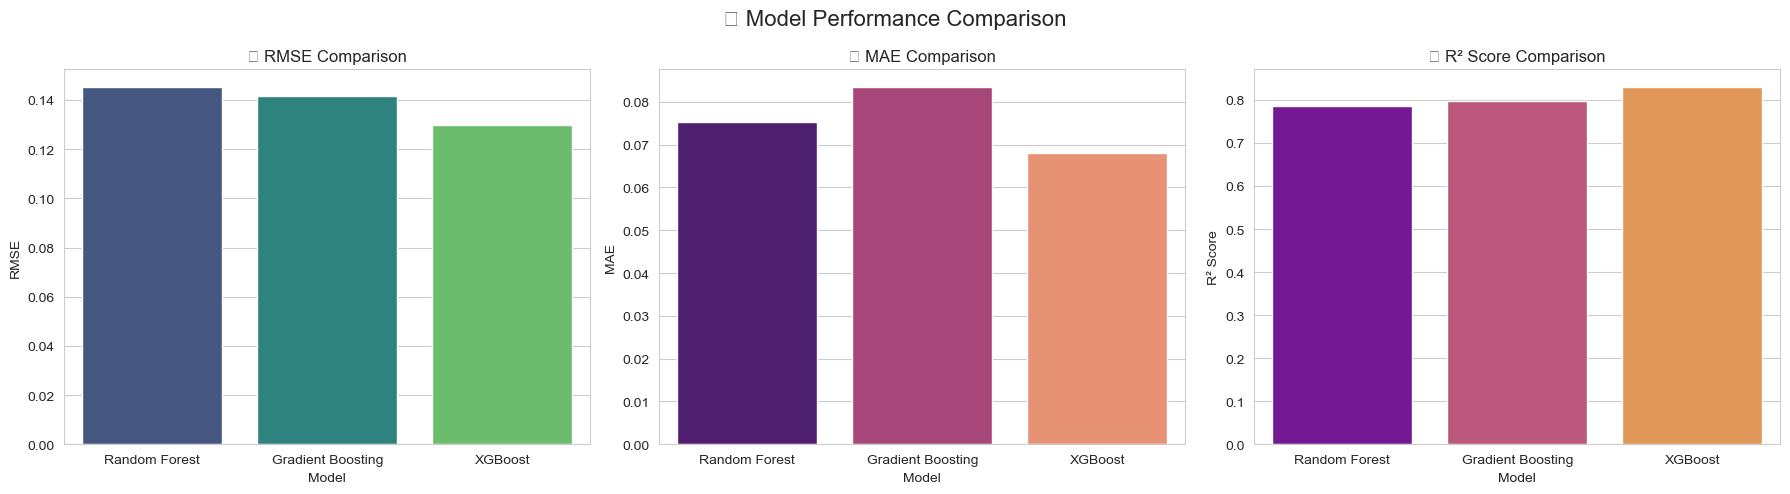

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score

# === 1. Compare Evaluation Metrics Across Models ===
metrics = {
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'RMSE': [rmse, rmse_gb, rmse_xgb],
    'MAE': [mae, mae_gb, mae_xgb],
    'R² Score': [r2, r2_gb, r2_xgb]
}

metrics_df = pd.DataFrame(metrics)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[0], palette="viridis")
axes[0].set_title('📉 RMSE Comparison')

# MAE
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[1], palette="magma")
axes[1].set_title('📉 MAE Comparison')

# R²
sns.barplot(x='Model', y='R² Score', data=metrics_df, ax=axes[2], palette="plasma")
axes[2].set_title('📈 R² Score Comparison')

plt.suptitle("📊 Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()


c:\Users\ameni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


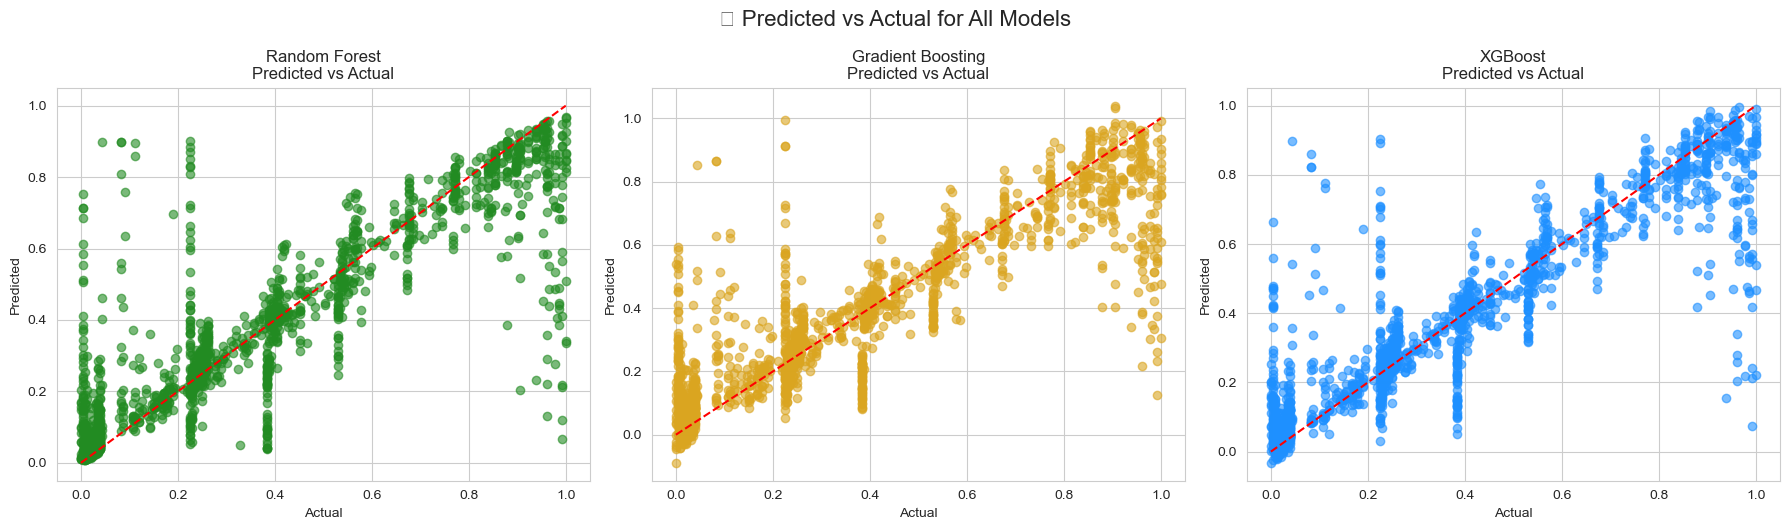

In [54]:
plt.figure(figsize=(18, 5))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Random Forest\nPredicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Gradient Boosting
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='goldenrod')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Gradient Boosting\nPredicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('XGBoost\nPredicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.suptitle('🎯 Predicted vs Actual for All Models', fontsize=16, y=1.05)
plt.show()


c:\Users\ameni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


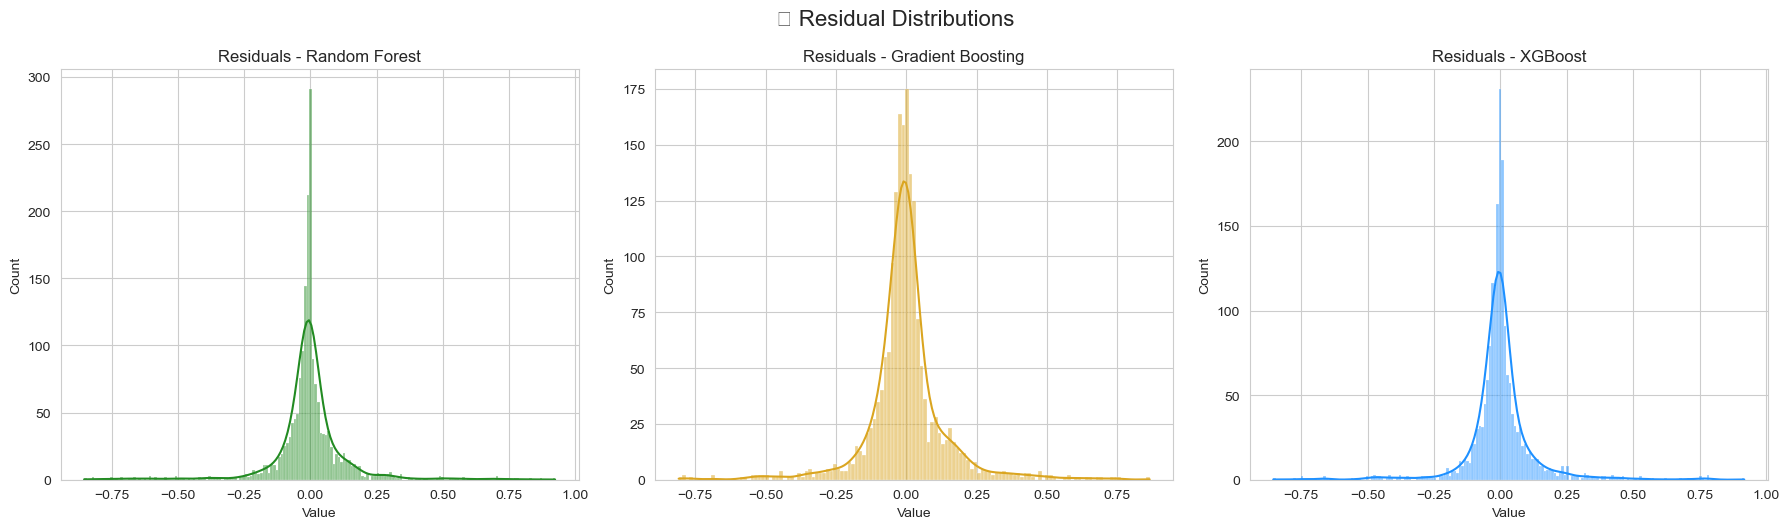

In [55]:
import seaborn as sns

plt.figure(figsize=(18, 5))

# Residuals
residuals_rf = y_test - y_pred
residuals_gb = y_test - y_pred_gb
residuals_xgb = y_test - y_pred_xgb

# RF
plt.subplot(1, 3, 1)
sns.histplot(residuals_rf, kde=True, color='forestgreen')
plt.title('Residuals - Random Forest')

# GB
plt.subplot(1, 3, 2)
sns.histplot(residuals_gb, kde=True, color='goldenrod')
plt.title('Residuals - Gradient Boosting')

# XGB
plt.subplot(1, 3, 3)
sns.histplot(residuals_xgb, kde=True, color='dodgerblue')
plt.title('Residuals - XGBoost')

plt.tight_layout()
plt.suptitle('📉 Residual Distributions', fontsize=16, y=1.05)
plt.show()


C:\Users\ameni\AppData\Local\Temp\ipykernel_38396\1062014986.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\ameni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


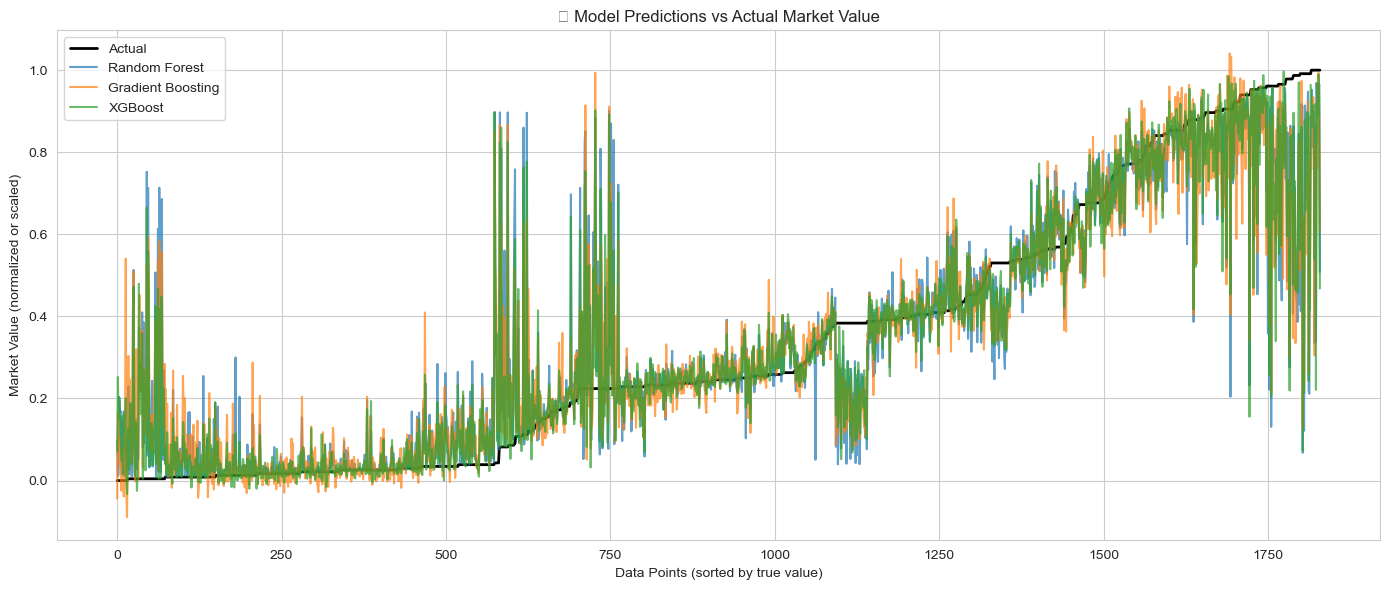

In [56]:
# Sort values
sorted_index = np.argsort(y_test.values)

plt.figure(figsize=(14, 6))
plt.plot(y_test.values[sorted_index], label='Actual', linewidth=2, color='black')
plt.plot(y_pred[sorted_index], label='Random Forest', alpha=0.7)
plt.plot(y_pred_gb[sorted_index], label='Gradient Boosting', alpha=0.7)
plt.plot(y_pred_xgb[sorted_index], label='XGBoost', alpha=0.7)
plt.legend()
plt.title('📊 Model Predictions vs Actual Market Value')
plt.xlabel('Data Points (sorted by true value)')
plt.ylabel('Market Value (normalized or scaled)')
plt.tight_layout()
plt.show()
